# ERA & TRMM

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import arrow as ar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from TRMM import TRMM
from ERA import ERA
from Visualization import Visualization

# force autoreload of external modules on save
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
YEARS_ERA = range(1979, 2018)
YEARS_TRMM = range(1998, 2018)

In [3]:
# read onset dates
onset_dates = pd.read_csv('../00_DATA/onset_dates_v2.csv', sep=';')
onset_dates = onset_dates[onset_dates['year'] >= 1979]
onset_dates = onset_dates.set_index('year')

for col in ['imd', 'objective', 'eg_objective']:
    onset_dates[col] = onset_dates[col].apply(lambda string: ar.get(string, 'D MMM'))

onset_dates.head(3)

imd                  objective  \
year                                                         
1979  0001-06-16T00:00:00+00:00  0001-06-18T00:00:00+00:00   
1980  0001-06-04T00:00:00+00:00  0001-06-06T00:00:00+00:00   
1981  0001-06-01T00:00:00+00:00  0001-06-04T00:00:00+00:00   

                   eg_objective  
year                             
1979  0001-06-24T00:00:00+00:00  
1980  0001-06-17T00:00:00+00:00  
1981  0001-06-20T00:00:00+00:00

In [4]:
# read the ERA dataset

era_invariant = ERA.load_dataset_v2(YEARS_ERA, level='invariant', variables=['z'], timestamp=False)
era_surface = ERA.load_dataset_v2(YEARS_ERA, level='surface', variables=['sp', 'msl'], timestamp=False)
era_1000 = ERA.load_dataset_v2(YEARS_ERA, level=1000, variables=['r', 't'], timestamp=False)
era_700 = ERA.load_dataset_v2(YEARS_ERA, level=700, variables=['u', 'v'], timestamp=False)
era_200 = ERA.load_dataset_v2(YEARS_ERA, level=200, variables=['u', 'z'], timestamp=False)

era_1000['r'][1979].info()

> Loading from cache...
> Loading from cache...
> Loading from cache...
> Loading from cache...
> Loading from cache...
> Loading from cache...
> Loading from cache...
> Loading from cache...
> Loading from cache...
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2401 entries, (4.5, 61.5) to (40.5, 97.5)
Columns: 245 entries, 1979-03-01 to 1979-10-31
Freq: 24H
dtypes: float64(245)
memory usage: 4.5 MB


In [59]:
# read the TRMM dataset

trmm_dict = TRMM.load_dataset(
    YEARS_TRMM,
    range(3, 10),
    aggregation_resolution=None,
    timestamp=False,
    invalidate=False,
    bundled=False,
    lon_slice=slice(61.125, 97.625),
    lat_slice=slice(4.125, 40.625),
    version='v3')

trmm_dict[1998].info()

> Processing: Failure for 1998-04-31 at 00_DATA/TRMM/3B42_Daily.19980431_v3.trmm
Failure for 1998-06-31 at 00_DATA/TRMM/3B42_Daily.19980631_v3.trmm
Failure for 1998-09-31 at 00_DATA/TRMM/3B42_Daily.19980931_v3.trmm
1998 Failure for 1999-04-31 at 00_DATA/TRMM/3B42_Daily.19990431_v3.trmm
Failure for 1999-06-31 at 00_DATA/TRMM/3B42_Daily.19990631_v3.trmm
Failure for 1999-09-31 at 00_DATA/TRMM/3B42_Daily.19990931_v3.trmm
1999 Failure for 2000-04-31 at 00_DATA/TRMM/3B42_Daily.20000431_v3.trmm
Failure for 2000-06-31 at 00_DATA/TRMM/3B42_Daily.20000631_v3.trmm
Failure for 2000-09-31 at 00_DATA/TRMM/3B42_Daily.20000931_v3.trmm
2000 Failure for 2001-04-31 at 00_DATA/TRMM/3B42_Daily.20010431_v3.trmm
Failure for 2001-06-31 at 00_DATA/TRMM/3B42_Daily.20010631_v3.trmm
Failure for 2001-09-31 at 00_DATA/TRMM/3B42_Daily.20010931_v3.trmm
2001 Failure for 2002-04-31 at 00_DATA/TRMM/3B42_Daily.20020431_v3.trmm
Failure for 2002-06-31 at 00_DATA/TRMM/3B42_Daily.20020631_v3.trmm
Failure for 2002-09-31 at 00

## Geopotential

In [6]:
era_invariant['z'][1979].head(3)

time                1979-03-01  1979-03-02  1979-03-03  1979-03-04  \
latitude longitude                                                   
4.5      61.50        5.471956    5.471956    5.471956    5.471956   
         62.25       -1.810665   -1.810665   -1.810665   -1.810665   
         63.00       -6.665745   -6.665745   -6.665745   -6.665745   

time                1979-03-05  1979-03-06  1979-03-07  1979-03-08  \
latitude longitude                                                   
4.5      61.50        5.471956    5.471956    5.471956    5.471956   
         62.25       -1.810665   -1.810665   -1.810665   -1.810665   
         63.00       -6.665745   -6.665745   -6.665745   -6.665745   

time                1979-03-09  1979-03-10     ...      1979-10-22  \
latitude longitude                             ...                   
4.5      61.50        5.471956    5.471956     ...        5.471956   
         62.25       -1.810665   -1.810665     ...       -1.810665   
         63.00       -6.665745   -6.665745     ...       -6.665745   

time                1979-10-23  1979-10-24  1979-10-25  1979-10-26  \
latitude longitude                                                   
4.5      61.50        5.471956    5.471956    5.471956    5.471956   
         62.25       -1.810665   -1.810665   -1.810665   -1.810665   
         63.00       -6.665745   -6.665745   -6.665745   -6.665745   

time                1979-10-27  1979-10-28  1979-10-29  1979-10-30  1979-10-31  
latitude longitude                                                              
4.5      61.50        5.471956    5.471956    5.471956    5.471956    5.471956  
         62.25       -1.810665   -1.810665   -1.810665   -1.810665   -1.810665  
         63.00       -6.665745   -6.665745   -6.665745   -6.665745   -6.665745  

[3 rows x 245 columns]

In [7]:
era_200['z'][1979].head(3)

time                   1979-03-01     1979-03-02     1979-03-03  \
latitude longitude                                                
4.5      61.50      121854.404032  121925.095656  121773.875062   
         62.25      121855.181869  121928.893330  121777.901510   
         63.00      121854.587053  121931.455615  121780.326531   

time                   1979-03-04     1979-03-05     1979-03-06  \
latitude longitude                                                
4.5      61.50      121726.472782  121755.618778  121806.910242   
         62.25      121731.002536  121760.880615  121801.099345   
         63.00      121733.244536  121764.403757  121807.916854   

time                   1979-03-07     1979-03-08     1979-03-09  \
latitude longitude                                                
4.5      61.50      121954.012878  121845.344523  121775.384980   
         62.25      121949.666143  121851.795992  121778.267551   
         63.00      121945.639695  121856.646032  121777.215184   

time                   1979-03-10      ...           1979-10-22  \
latitude longitude                     ...                        
4.5      61.50      121731.460087      ...        121917.317290   
         62.25      121733.107271      ...        121918.461167   
         63.00      121733.519067      ...        121912.650270   

time                   1979-10-23     1979-10-24     1979-10-25  \
latitude longitude                                                
4.5      61.50      121889.177906  121895.629374  121972.909733   
         62.25      121899.061006  121909.676189  121981.648956   
         63.00      121905.787006  121922.213085  121990.342424   

time                   1979-10-26     1979-10-27     1979-10-28  \
latitude longitude                                                
4.5      61.50      121932.279207  121840.997789  121852.436563   
         62.25      121934.383941  121846.625666  121854.175257   
         63.00      121934.017900  121851.521461  121853.260155   

time                   1979-10-29     1979-10-30     1979-10-31  
latitude longitude                                               
4.5      61.50      121894.439742  121967.830917  121979.132426  
         62.25      121911.369127  121984.028221  121985.629649  
         63.00      121926.651330  121996.107567  121990.799975  

[3 rows x 245 columns]

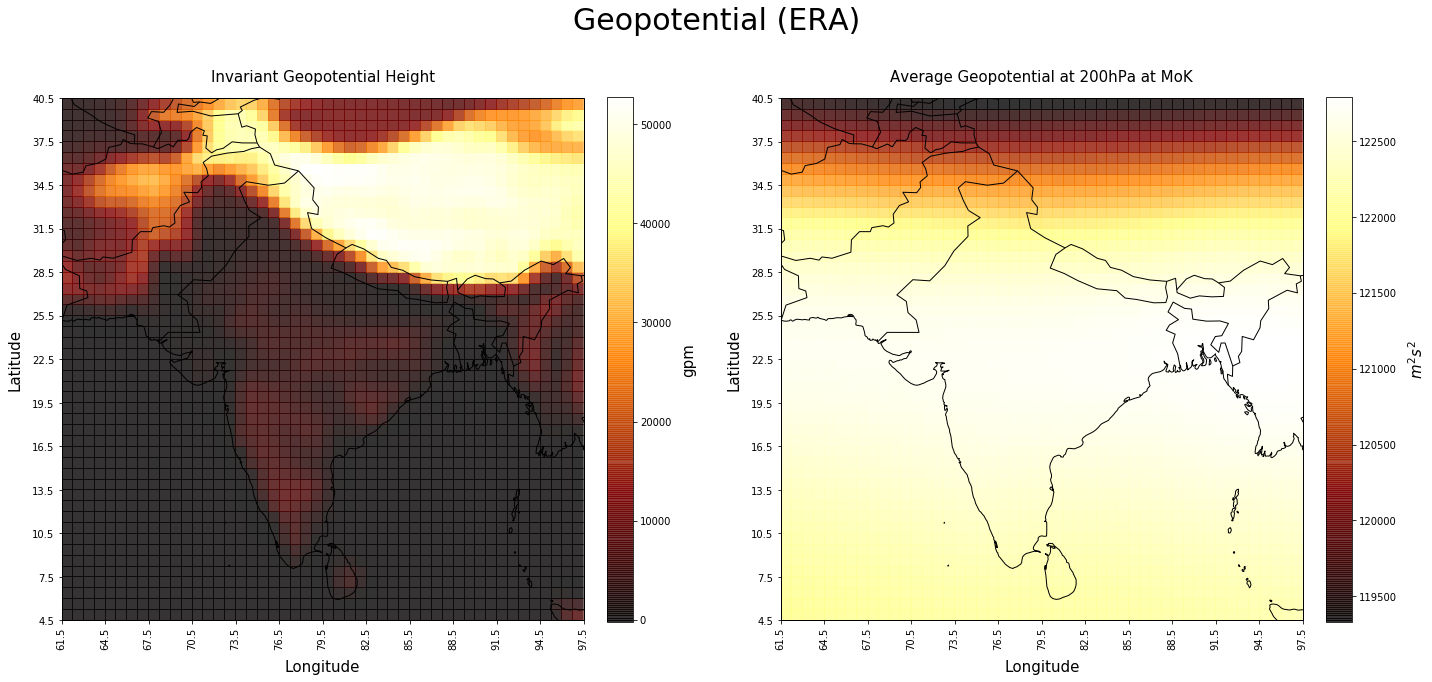

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))

z_invariant = Visualization.prepare_cartopy_df(era_invariant['z'], onset_dates=onset_dates['objective'])
Visualization.create_cartopy_vis(z_invariant, ax=axes[0], title='Invariant Geopotential Height', filename='output/geopotential_invariant.png', clabel='gpm')

z_onset = Visualization.prepare_cartopy_df(era_200['z'], onset_dates=onset_dates['objective'], offset=0)
Visualization.create_cartopy_vis(z_onset, ax=axes[1], title='Average Geopotential at 200hPa at MoK', filename='output/geopotential_onset.png', clabel='$m^2s^2$')

supttl = fig.suptitle('Geopotential (ERA)', size=30)
supttl.set_position([0.5, 1])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig('output/geopotential.png', bbox_inches='tight')

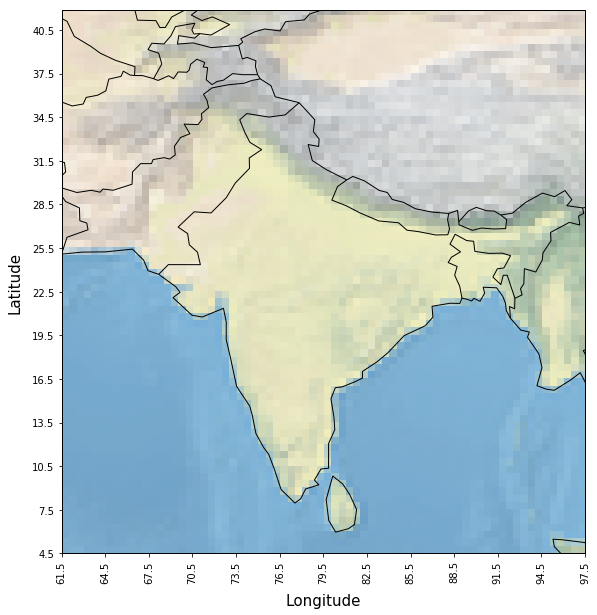

## Mean Sea-Level Pressure

In [10]:
era_surface['msl'][1979].head(3)

time                   1979-03-01     1979-03-02     1979-03-03  \
latitude longitude                                                
4.5      61.50      101131.941427  101200.569747  101185.321977   
         62.25      101129.992063  101192.318327  101177.577925   
         63.00      101126.280259  101179.954548  101169.940688   

time                   1979-03-04     1979-03-05     1979-03-06  \
latitude longitude                                                
4.5      61.50      101120.298646  101144.705761  101172.157089   
         62.25      101115.919252  101144.251799  101159.312644   
         63.00      101112.634706  101144.865983  101144.652354   

time                   1979-03-07     1979-03-08     1979-03-09  \
latitude longitude                                                
4.5      61.50      101122.942305  101116.293102  101056.316757   
         62.25      101109.804121  101111.513153  101054.714540   
         63.00      101093.781945  101105.851984  101050.174923   

time                   1979-03-10      ...           1979-10-22  \
latitude longitude                     ...                        
4.5      61.50      100948.434107      ...        101105.718466   
         62.25      100949.662473      ...        101101.873144   
         63.00      100949.368734      ...        101098.455080   

time                   1979-10-23     1979-10-24     1979-10-25  \
latitude longitude                                                
4.5      61.50      101200.489636  101279.105113  101275.954085   
         62.25      101196.804536  101274.084831  101273.791091   
         63.00      101190.235444  101269.117956  101274.538792   

time                   1979-10-26     1979-10-27     1979-10-28  \
latitude longitude                                                
4.5      61.50      101212.746601  101103.635583  101014.926136   
         62.25      101203.026481  101087.319668  101008.357044   
         63.00      101195.202318  101072.152008  101003.416873   

time                   1979-10-29     1979-10-30     1979-10-31  
latitude longitude                                               
4.5      61.50      101057.625235  101022.616781  101010.840482  
         62.25      101042.804722  101013.590955  101011.000703  
         63.00      101031.268756  101009.799040  101011.908627  

[3 rows x 245 columns]

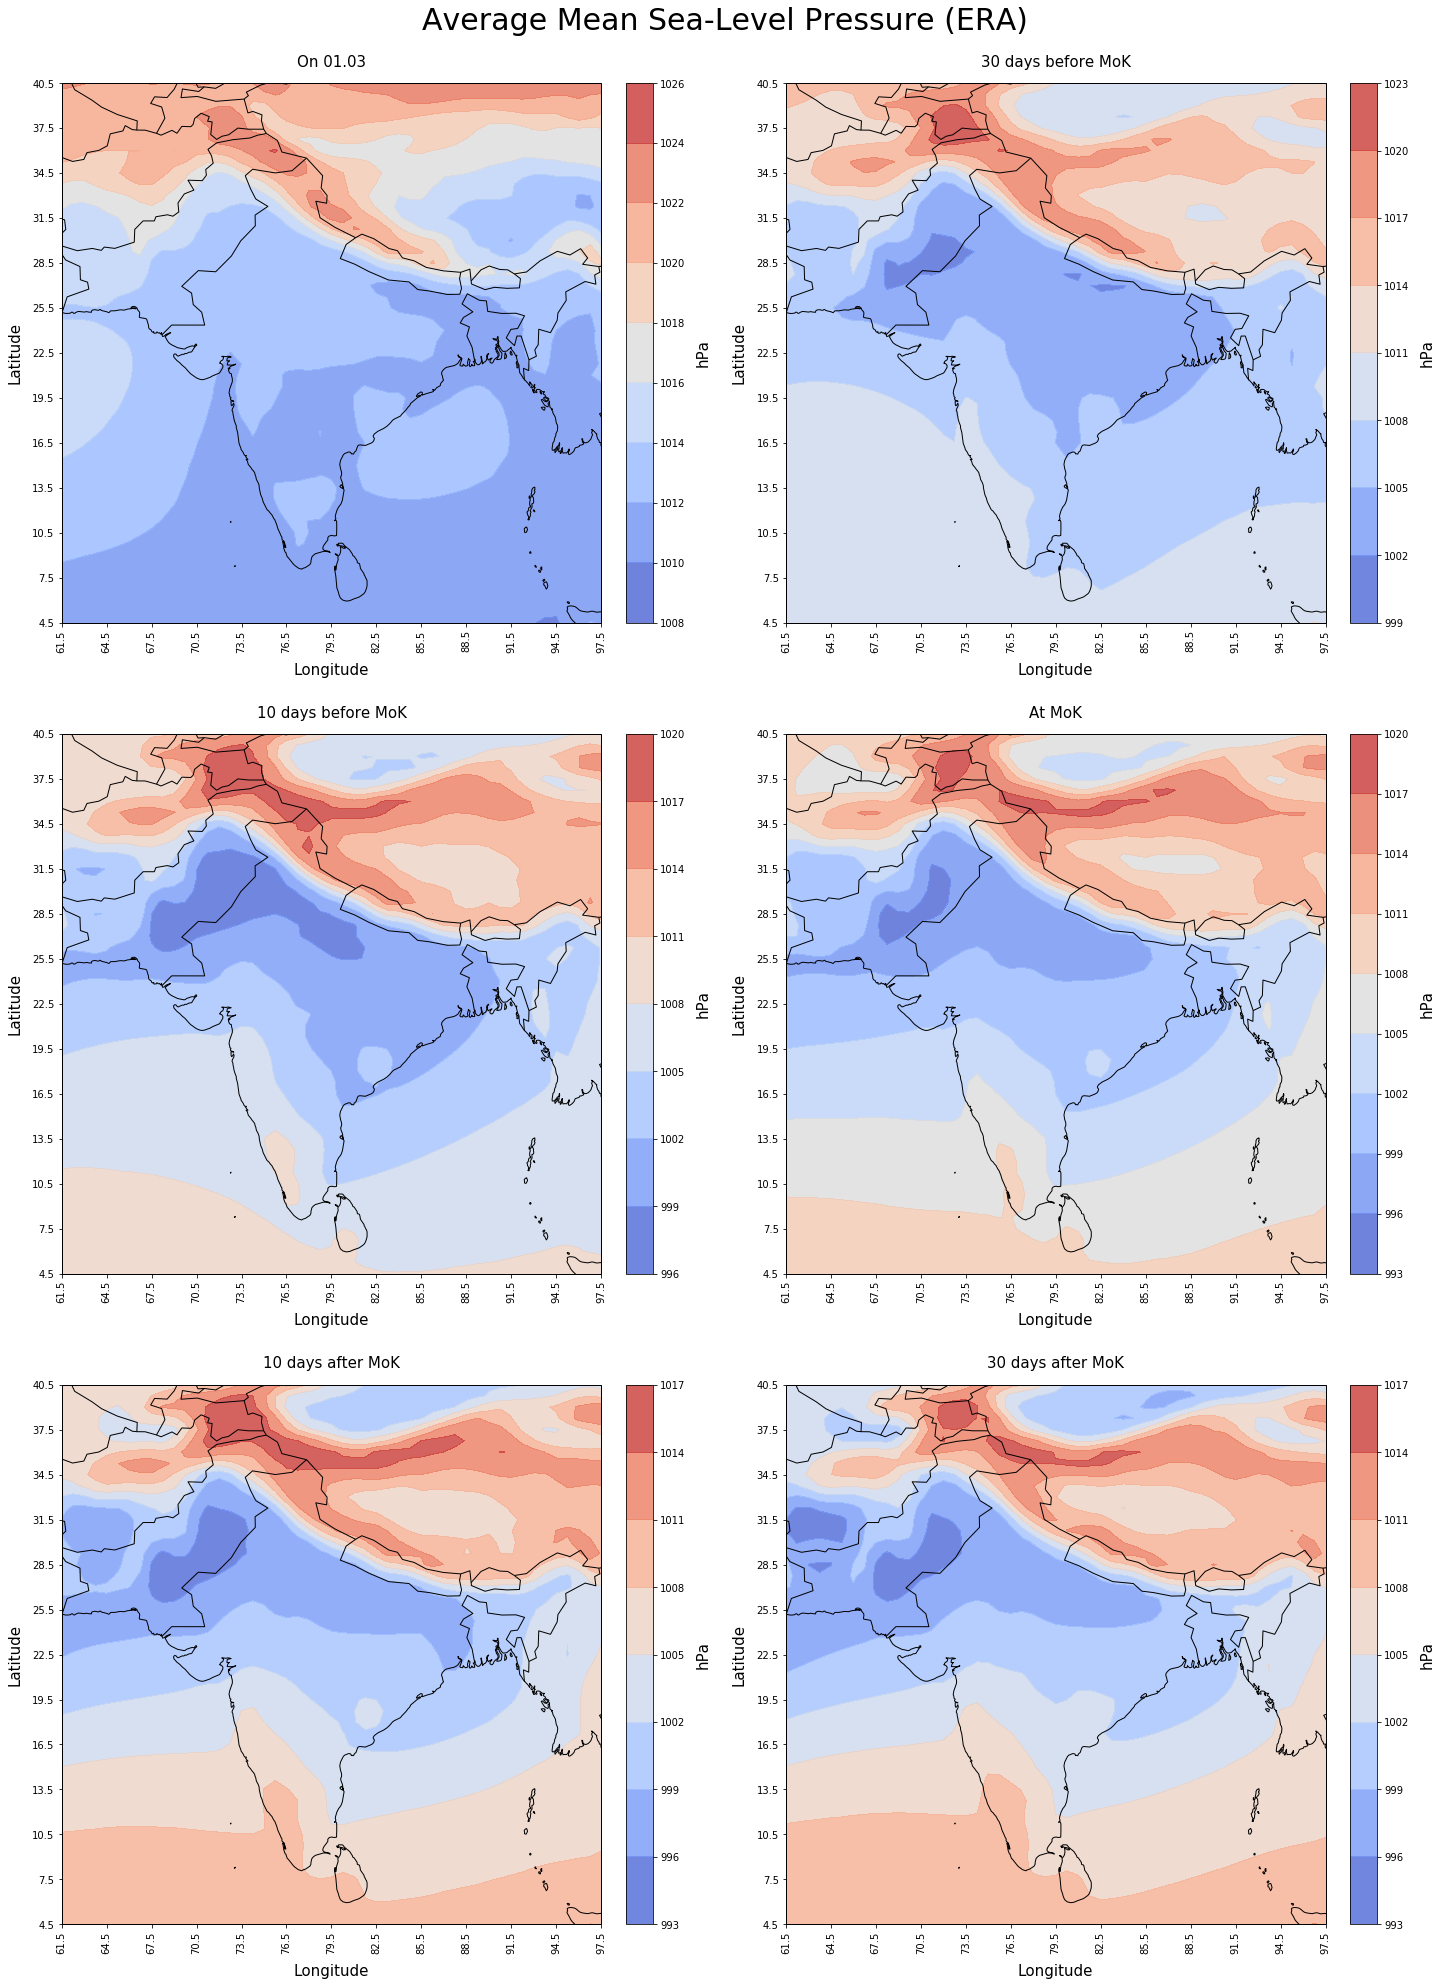

In [118]:
fig, axes = plt.subplots(3, 2, figsize=(20, 27), subplot_kw=dict(projection=ccrs.PlateCarree()))

msl_first = Visualization.prepare_cartopy_df(era_surface['msl'], month=3, day=1)
msl_first['val'] = msl_first['val'] / 100
Visualization.create_cartopy_vis(msl_first, ax=axes[0, 0], title='On 01.03', vis_type='contour', cmap='coolwarm', clabel='hPa')

msl_min30 = Visualization.prepare_cartopy_df(era_surface['msl'], onset_dates=onset_dates['objective'], offset=-30)
msl_min30['val'] = msl_min30['val'] / 100
Visualization.create_cartopy_vis(msl_min30, ax=axes[0, 1], title='30 days before MoK', cmap='coolwarm', vis_type='contour', clabel='hPa')

msl_min10 = Visualization.prepare_cartopy_df(era_surface['msl'], onset_dates=onset_dates['objective'], offset=-10)
msl_min10['val'] = msl_min10['val'] / 100
Visualization.create_cartopy_vis(msl_min10, ax=axes[1, 0], title='10 days before MoK', cmap='coolwarm', vis_type='contour', clabel='hPa')

msl_onset = Visualization.prepare_cartopy_df(era_surface['msl'], onset_dates=onset_dates['objective'])
msl_onset['val'] = msl_onset['val'] / 100
Visualization.create_cartopy_vis(msl_onset, ax=axes[1, 1], title='At MoK', cmap='coolwarm', vis_type='contour', clabel='hPa')

msl_plus10 = Visualization.prepare_cartopy_df(era_surface['msl'], onset_dates=onset_dates['objective'], offset=+10)
msl_plus10['val'] = msl_plus10['val'] / 100
Visualization.create_cartopy_vis(msl_plus10, ax=axes[2, 0], title='10 days after MoK', cmap='coolwarm', vis_type='contour', clabel='hPa')

msl_plus30 = Visualization.prepare_cartopy_df(era_surface['msl'], onset_dates=onset_dates['objective'], offset=+30)
msl_plus30['val'] = msl_plus30['val'] / 100
Visualization.create_cartopy_vis(msl_plus30, ax=axes[2, 1], title='30 days after MoK', cmap='coolwarm', vis_type='contour', clabel='hPa')

supttl = fig.suptitle('Average Mean Sea-Level Pressure (ERA)', size=30)
supttl.set_position([0.5, 1.02])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig('output/msl_avg.png', bbox_inches='tight')

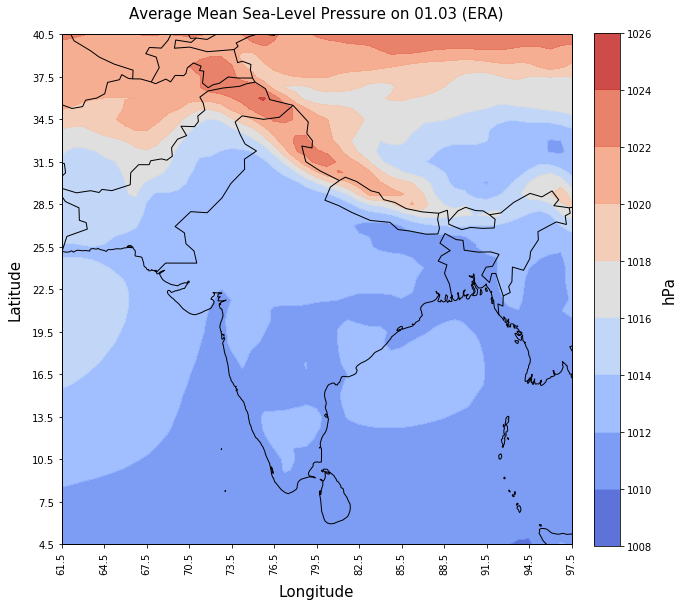

In [12]:
Visualization.create_cartopy_vis(msl_first, title='Average Mean Sea-Level Pressure on 01.03 (ERA)', filename='output/msl_avg_first.png', vis_type='contour', cmap='coolwarm', clabel='hPa')

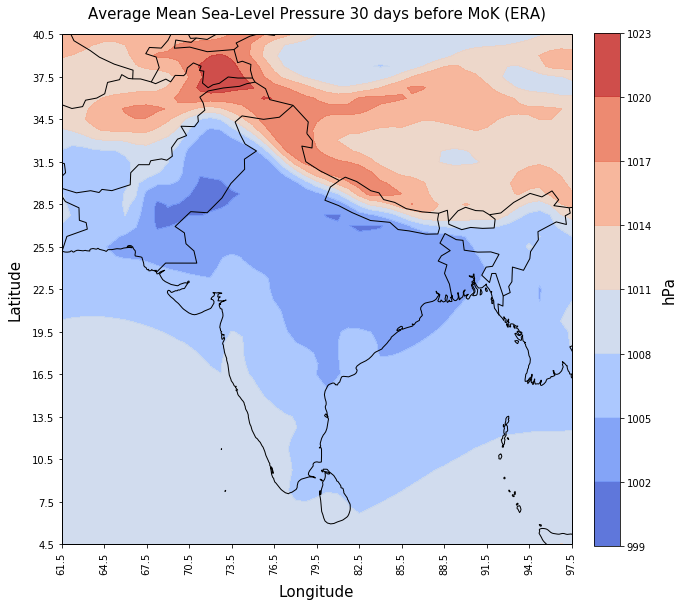

In [13]:
Visualization.create_cartopy_vis(msl_min30, title='Average Mean Sea-Level Pressure 30 days before MoK (ERA)', filename='output/msl_avg_min30.png', cmap='coolwarm', vis_type='contour', clabel='hPa')

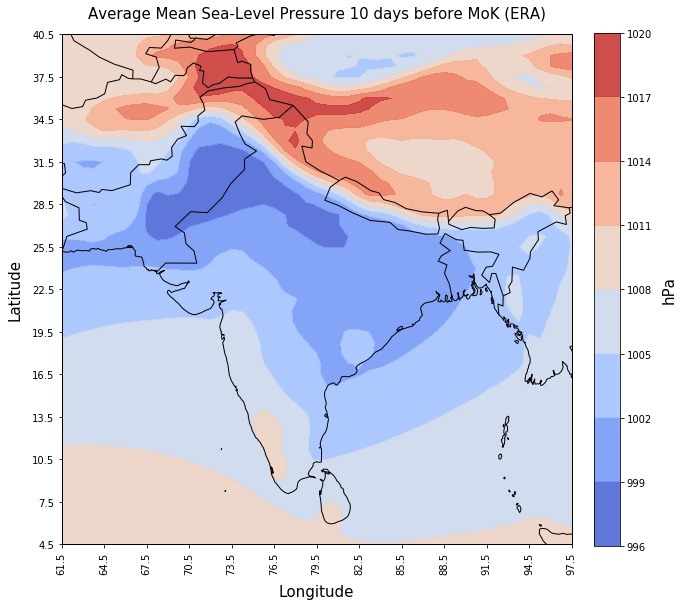

In [14]:
Visualization.create_cartopy_vis(msl_min10, title='Average Mean Sea-Level Pressure 10 days before MoK (ERA)', filename='output/msl_avg_min10.png', cmap='coolwarm', vis_type='contour', clabel='hPa')

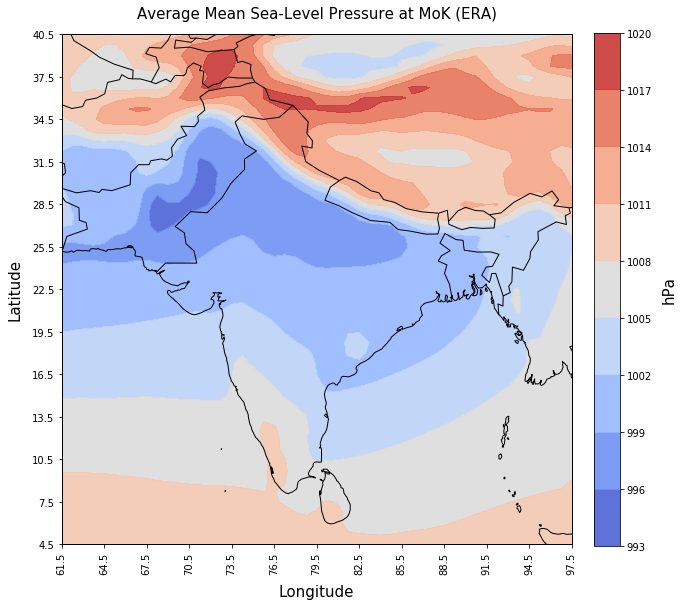

In [15]:
Visualization.create_cartopy_vis(msl_onset, title='Average Mean Sea-Level Pressure at MoK (ERA)', filename='output/msl_avg_onset.png', cmap='coolwarm', vis_type='contour', clabel='hPa')

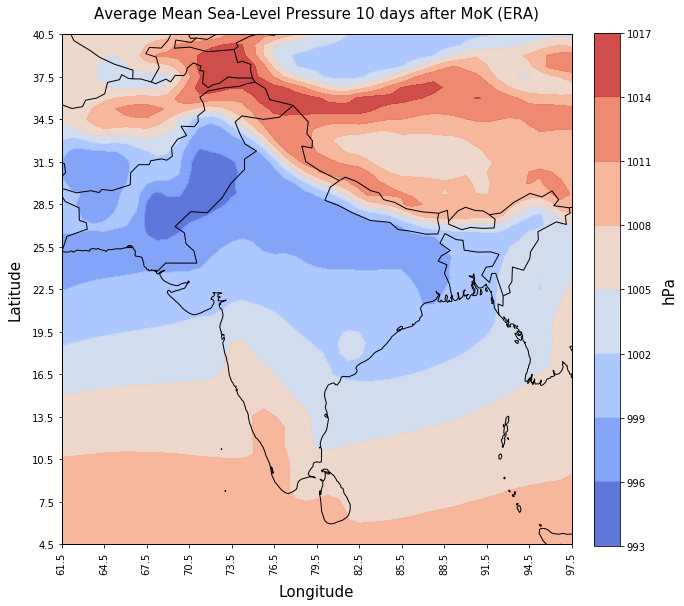

In [16]:
Visualization.create_cartopy_vis(msl_plus10, title='Average Mean Sea-Level Pressure 10 days after MoK (ERA)', filename='output/mean_avg_plus10.png', cmap='coolwarm', vis_type='contour', clabel='hPa')

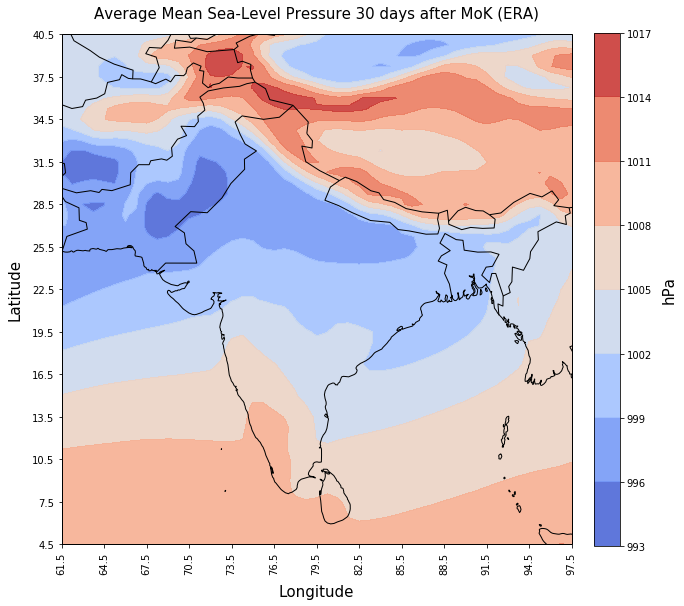

In [17]:
Visualization.create_cartopy_vis(msl_plus30, title='Average Mean Sea-Level Pressure 30 days after MoK (ERA)', filename='output/mean_avg_plus30.png', cmap='coolwarm', vis_type='contour', clabel='hPa')

## Relative Humidity at 1000 hPa

In [18]:
era_1000['r'][1979].head(3)

time                1979-03-01  1979-03-02  1979-03-03  1979-03-04  \
latitude longitude                                                   
4.5      61.50       71.780172   67.739810   65.776573   66.813567   
         62.25       72.045559   67.376731   65.720152   67.573682   
         63.00       71.502769   67.235679   65.376402   67.669284   

time                1979-03-05  1979-03-06  1979-03-07  1979-03-08  \
latitude longitude                                                   
4.5      61.50       74.354636   74.305006   82.935311   86.416688   
         62.25       75.099078   73.712064   82.746719   88.235738   
         63.00       74.572483   73.282116   82.171017   89.014138   

time                1979-03-09  1979-03-10     ...      1979-10-22  \
latitude longitude                             ...                   
4.5      61.50       83.805655   79.477442     ...       76.488181   
         62.25       83.868345   81.834059     ...       77.139633   
         63.00       81.714425   81.134022     ...       77.362182   

time                1979-10-23  1979-10-24  1979-10-25  1979-10-26  \
latitude longitude                                                   
4.5      61.50        83.15577   79.678050   74.867125   83.796774   
         62.25        83.15577   79.087720   77.485994   86.169585   
         63.00        81.78025   78.330218   81.917645   87.588466   

time                1979-10-27  1979-10-28  1979-10-29  1979-10-30  1979-10-31  
latitude longitude                                                              
4.5      61.50       86.606847   80.414656   80.103296   79.732381   77.748769  
         62.25       85.990397   80.694148   80.884830   78.895994   76.364368  
         63.00       85.687396   80.978342   80.926100   80.498242   76.820437  

[3 rows x 245 columns]

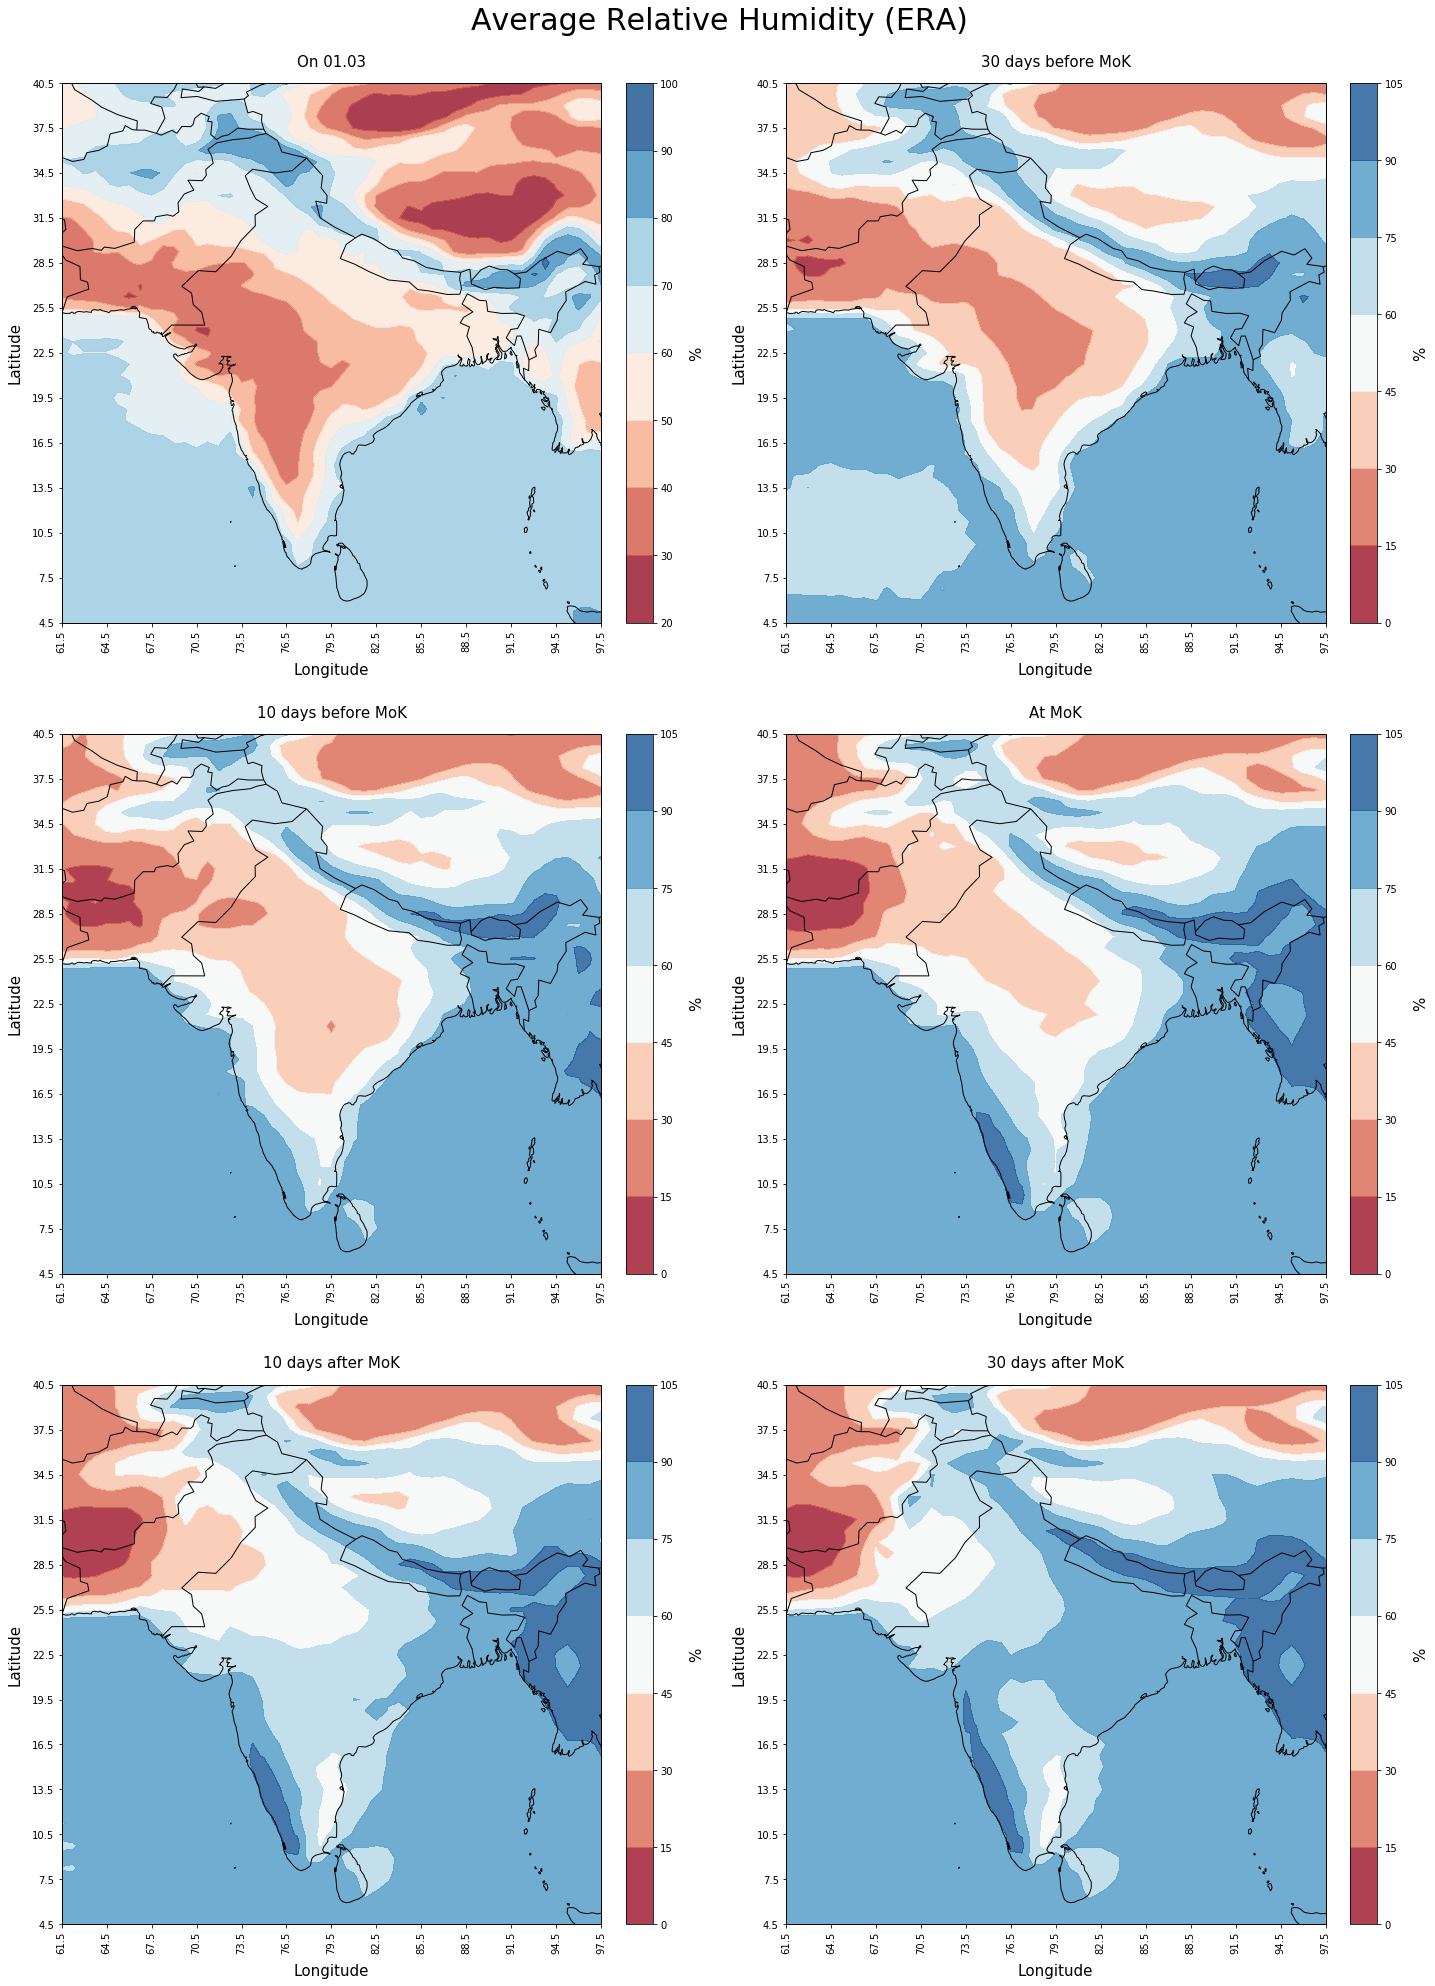

In [117]:
fig, axes = plt.subplots(3, 2, figsize=(20, 27), subplot_kw=dict(projection=ccrs.PlateCarree()))

r_first = Visualization.prepare_cartopy_df(era_1000['r'], month=3, day=1)
Visualization.create_cartopy_vis(r_first, ax=axes[0, 0], title='On 01.03', vis_type='contour', cmap='RdBu', clabel='%')

r_min30 = Visualization.prepare_cartopy_df(era_1000['r'], onset_dates=onset_dates['objective'], offset=-30)
Visualization.create_cartopy_vis(r_min30, ax=axes[0, 1], title='30 days before MoK', vis_type='contour', cmap='RdBu', clabel='%')

r_min10 = Visualization.prepare_cartopy_df(era_1000['r'], onset_dates=onset_dates['objective'], offset=-10)
Visualization.create_cartopy_vis(r_min10, ax=axes[1, 0], title='10 days before MoK', vis_type='contour', cmap='RdBu', clabel='%')

r_onset = Visualization.prepare_cartopy_df(era_1000['r'], onset_dates=onset_dates['objective'])
Visualization.create_cartopy_vis(r_onset, ax=axes[1, 1], title='At MoK', vis_type='contour', cmap='RdBu', clabel='%')

r_plus10 = Visualization.prepare_cartopy_df(era_1000['r'], onset_dates=onset_dates['objective'], offset=+10)
Visualization.create_cartopy_vis(r_plus10, ax=axes[2, 0], title='10 days after MoK', vis_type='contour', cmap='RdBu', clabel='%')

r_plus30 = Visualization.prepare_cartopy_df(era_1000['r'], onset_dates=onset_dates['objective'], offset=+30)
Visualization.create_cartopy_vis(r_plus30, ax=axes[2, 1], title='30 days after MoK', vis_type='contour', cmap='RdBu', clabel='%')

supttl = fig.suptitle('Average Relative Humidity (ERA)', size=30)
supttl.set_position([0.5, 1.02])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig('output/r_avg.png', bbox_inches='tight')

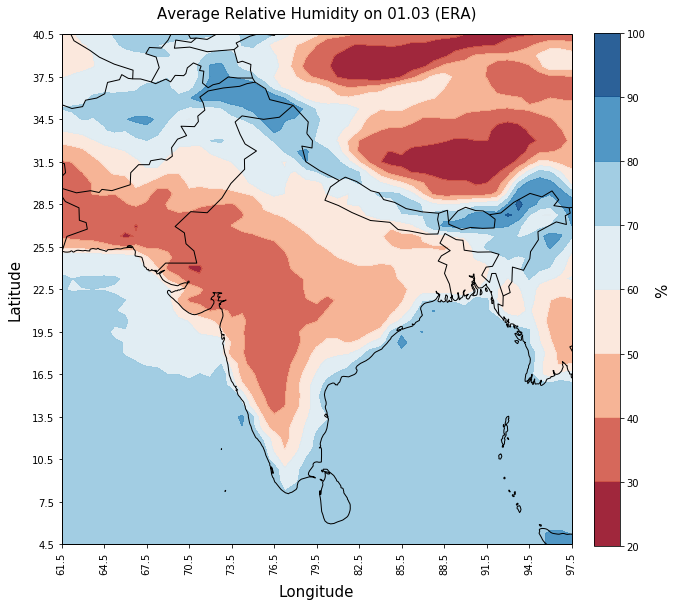

In [20]:
Visualization.create_cartopy_vis(r_first, title='Average Relative Humidity on 01.03 (ERA)', filename='output/r_avg_first.png', vis_type='contour', cmap='RdBu', clabel='%')

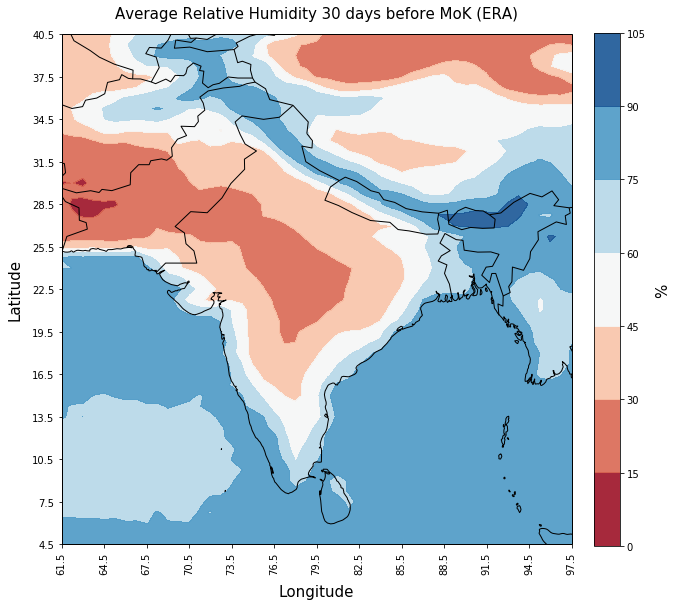

In [21]:
Visualization.create_cartopy_vis(r_min30, title='Average Relative Humidity 30 days before MoK (ERA)', filename='output/r_avg_min30.png', vis_type='contour', cmap='RdBu', clabel='%')

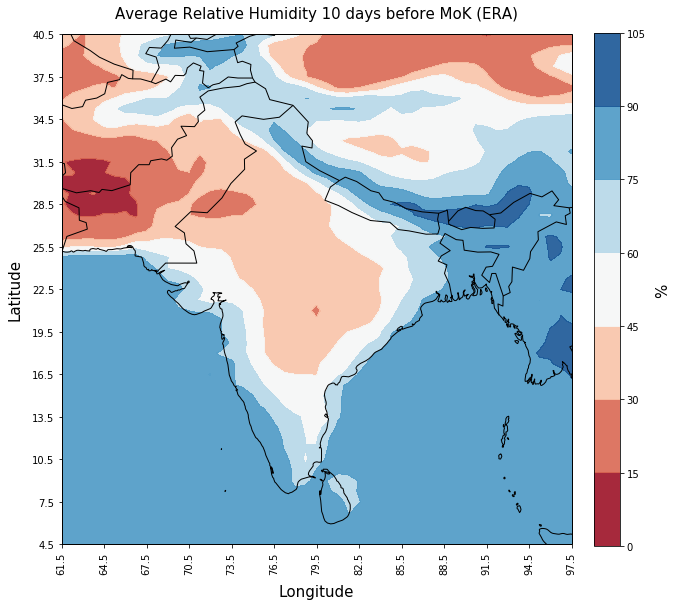

In [22]:
Visualization.create_cartopy_vis(r_min10, title='Average Relative Humidity 10 days before MoK (ERA)', filename='output/r_avg_min10.png', vis_type='contour', cmap='RdBu', clabel='%')

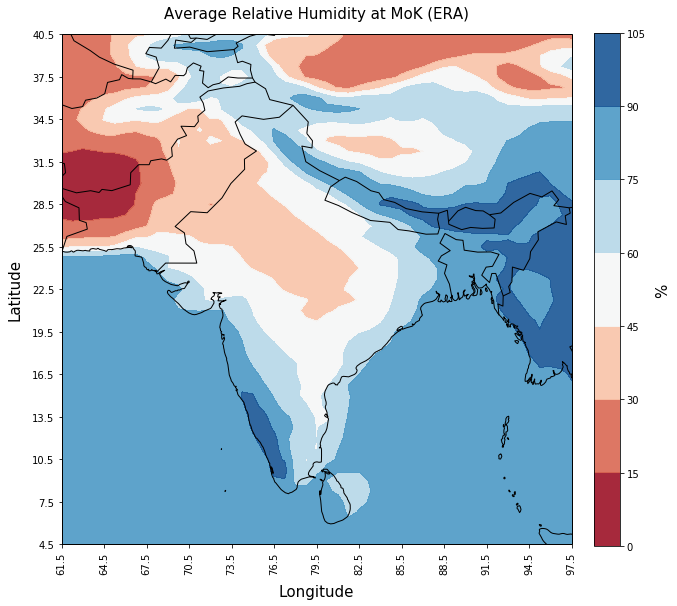

In [23]:
Visualization.create_cartopy_vis(r_onset, title='Average Relative Humidity at MoK (ERA)', filename='output/r_avg_onset.png', vis_type='contour', cmap='RdBu', clabel='%')

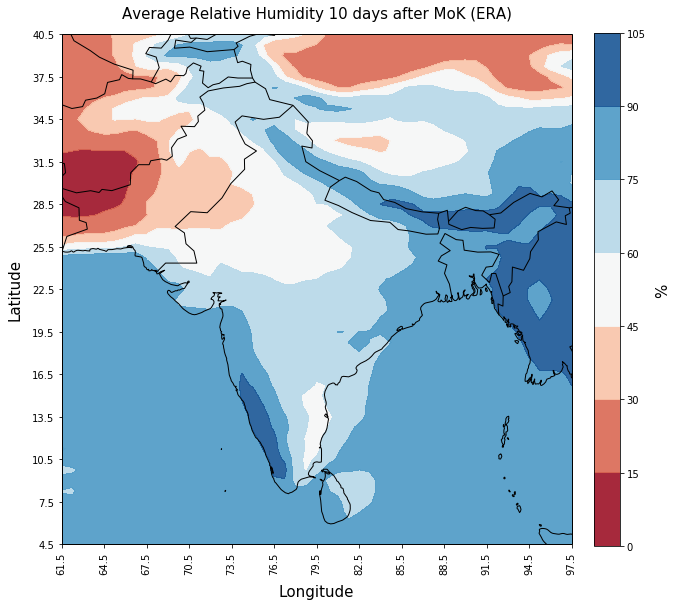

In [24]:
Visualization.create_cartopy_vis(r_plus10, title='Average Relative Humidity 10 days after MoK (ERA)', filename='output/r_avg_plus10.png', vis_type='contour', cmap='RdBu', clabel='%')

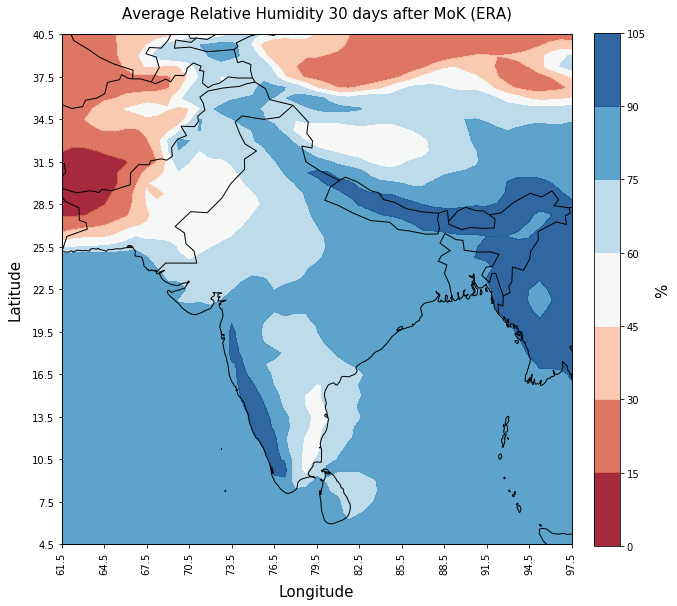

In [25]:
Visualization.create_cartopy_vis(r_plus30, title='Average Relative Humidity 30 days after MoK (ERA)', filename='output/r_avg_plus30.png', vis_type='contour', cmap='RdBu', clabel='%')

## Temperature at 1000 hPa

In [26]:
era_1000['t'][1979].head(3)

time                1979-03-01  1979-03-02  1979-03-03  1979-03-04  \
latitude longitude                                                   
4.5      61.50      298.457967  298.611718  299.196102  299.690161   
         62.25      298.438283  298.714072  299.343292  299.733028   
         63.00      298.534295  298.994017  299.554126  299.796015   

time                1979-03-05  1979-03-06  1979-03-07  1979-03-08  \
latitude longitude                                                   
4.5      61.50      299.554782  299.328420  298.973240  298.348394   
         62.25      299.562436  299.558281  299.114087  298.232261   
         63.00      299.590431  299.787267  299.483702  298.264630   

time                1979-03-09  1979-03-10     ...      1979-10-22  \
latitude longitude                             ...                   
4.5      61.50      298.620028  299.495731     ...      299.824666   
         62.25      298.674049  299.389658     ...      299.742432   
         63.00      298.951588  299.486108     ...      299.688849   

time                1979-10-23  1979-10-24  1979-10-25  1979-10-26  \
latitude longitude                                                   
4.5      61.50      298.396073  298.485524  299.448709  298.275565   
         62.25      298.297654  298.574975  299.145362  297.944661   
         63.00      298.417068  298.699856  298.622215  297.901139   

time                1979-10-27  1979-10-28  1979-10-29  1979-10-30  1979-10-31  
latitude longitude                                                              
4.5      61.50      297.750887  299.139895  299.339137  299.616894  300.048841  
         62.25      297.993433  299.110151  299.521101  299.794484  300.075304  
         63.00      298.141279  299.048038  299.634172  299.710501  299.905369  

[3 rows x 245 columns]

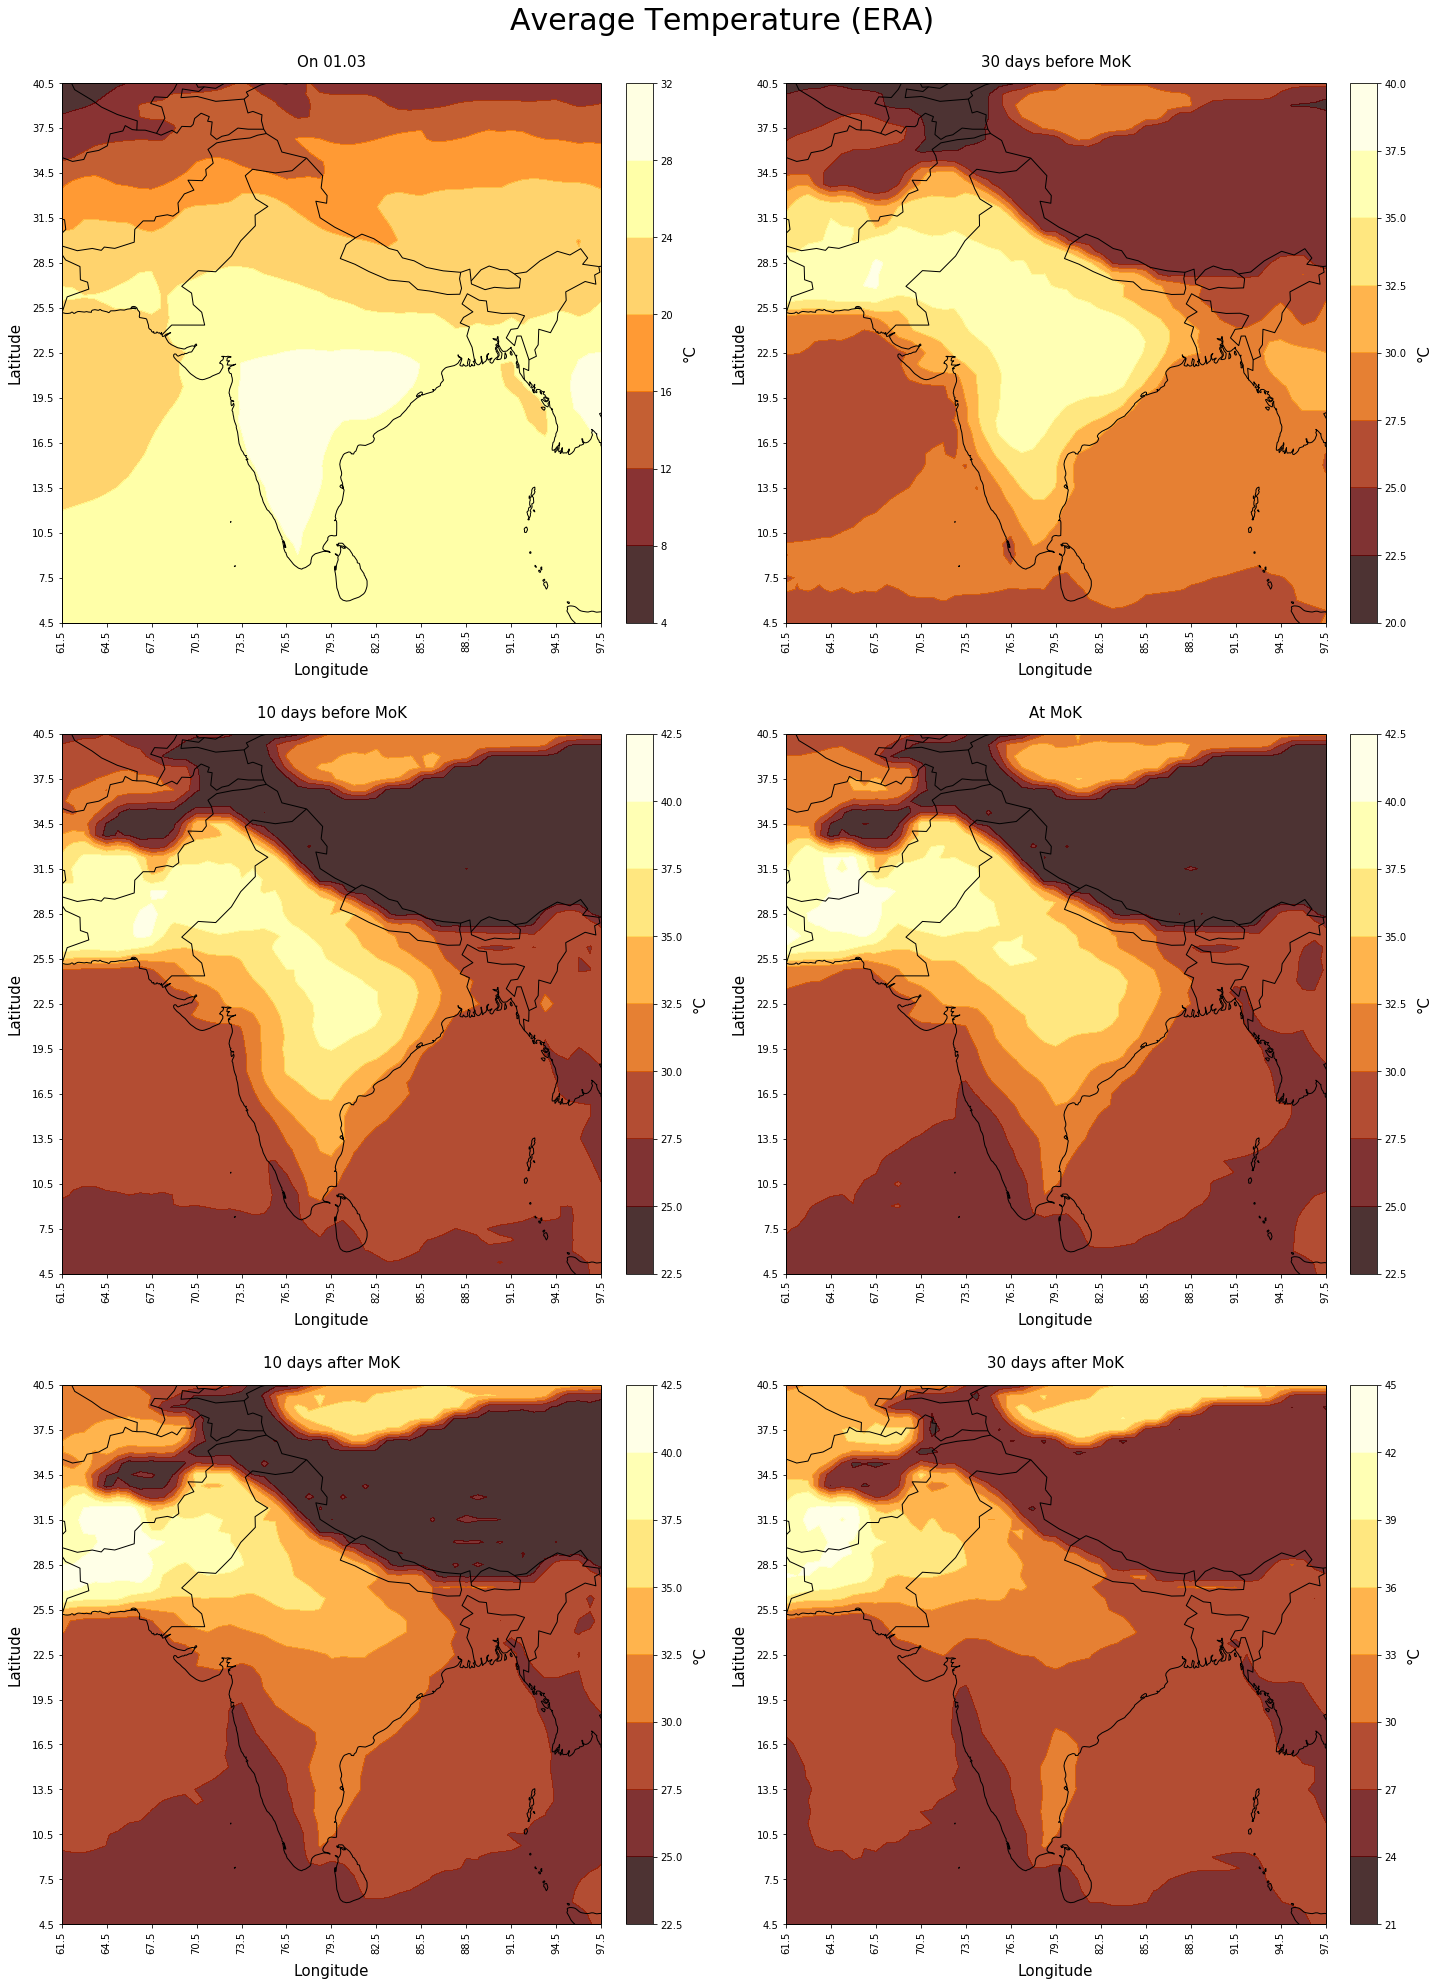

In [120]:
fig, axes = plt.subplots(3, 2, figsize=(20, 27), subplot_kw=dict(projection=ccrs.PlateCarree()))

t_first = Visualization.prepare_cartopy_df(era_1000['t'], month=3, day=1)
t_first['val'] = t_first['val'] - 273.15
Visualization.create_cartopy_vis(t_first, ax=axes[0, 0], title='On 01.03', vis_type='contour', clabel='°C')

t_min30 = Visualization.prepare_cartopy_df(era_1000['t'], onset_dates=onset_dates['objective'], offset=-30)
t_min30['val'] = t_min30['val'] - 273.15
Visualization.create_cartopy_vis(t_min30, ax=axes[0, 1], title='30 days before MoK', vis_type='contour', clabel='°C')

t_min10 = Visualization.prepare_cartopy_df(era_1000['t'], onset_dates=onset_dates['objective'], offset=-10)
t_min10['val'] = t_min10['val'] - 273.15
Visualization.create_cartopy_vis(t_min10, ax=axes[1, 0], title='10 days before MoK', vis_type='contour', clabel='°C')

t_onset = Visualization.prepare_cartopy_df(era_1000['t'], onset_dates=onset_dates['objective'])
t_onset['val'] = t_onset['val'] - 273.15
Visualization.create_cartopy_vis(t_onset, ax=axes[1, 1], title='At MoK', vis_type='contour', clabel='°C')

t_plus10 = Visualization.prepare_cartopy_df(era_1000['t'], onset_dates=onset_dates['objective'], offset=+10)
t_plus10['val'] = t_plus10['val'] - 273.15
Visualization.create_cartopy_vis(t_plus10, ax=axes[2, 0], title='10 days after MoK', vis_type='contour', clabel='°C')

t_plus30 = Visualization.prepare_cartopy_df(era_1000['t'], onset_dates=onset_dates['objective'], offset=+30)
t_plus30['val'] = t_plus30['val'] - 273.15
Visualization.create_cartopy_vis(t_plus30, ax=axes[2, 1], title='30 days after MoK', vis_type='contour', clabel='°C')

supttl = fig.suptitle('Average Temperature (ERA)', size=30)
supttl.set_position([0.5, 1.02])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig('output/t_avg.png', bbox_inches='tight')

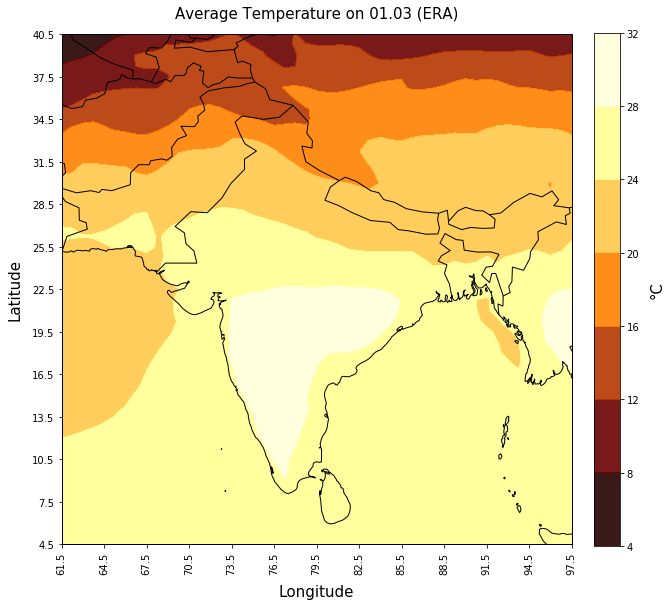

In [28]:
Visualization.create_cartopy_vis(t_first, title='Average Temperature on 01.03 (ERA)', filename='output/t_avg_first.png', vis_type='contour', clabel='°C')

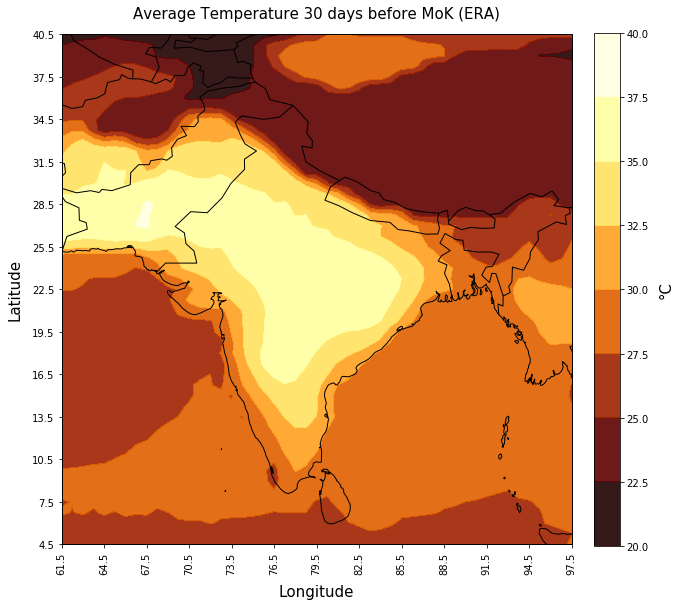

In [29]:
Visualization.create_cartopy_vis(t_min30, title='Average Temperature 30 days before MoK (ERA)', filename='output/t_avg_min30.png', vis_type='contour', clabel='°C')

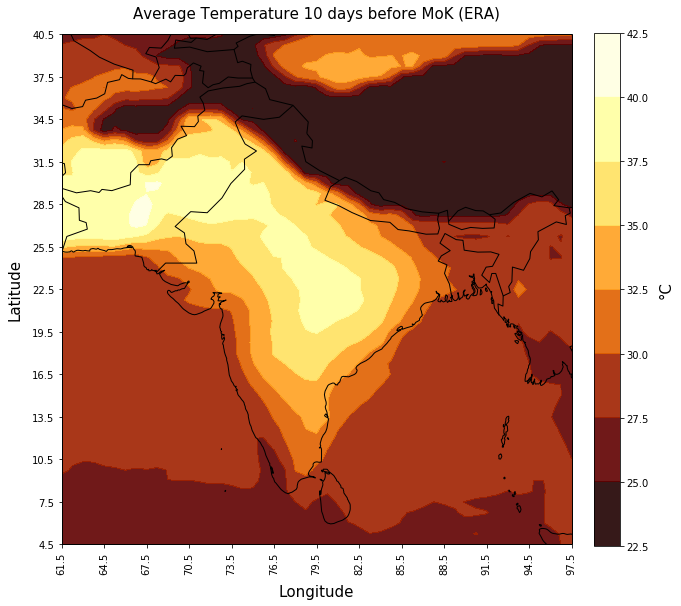

In [30]:
Visualization.create_cartopy_vis(t_min10, title='Average Temperature 10 days before MoK (ERA)', filename='output/t_avg_min10.png', vis_type='contour', clabel='°C')

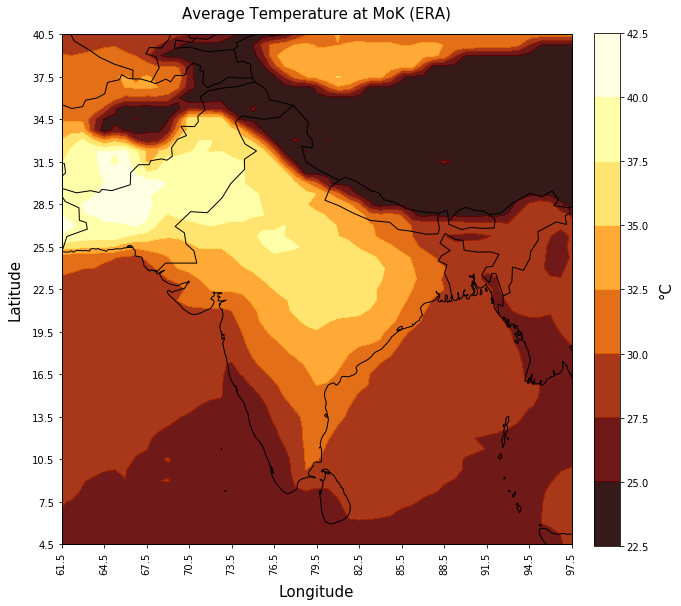

In [31]:
Visualization.create_cartopy_vis(t_onset, title='Average Temperature at MoK (ERA)', filename='output/t_avg_onset.png', vis_type='contour', clabel='°C')

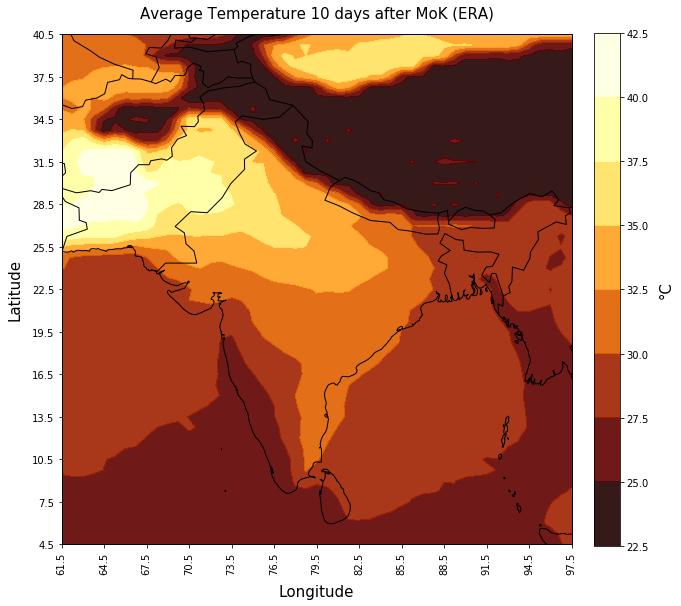

In [32]:
Visualization.create_cartopy_vis(t_plus10, title='Average Temperature 10 days after MoK (ERA)', filename='output/t_avg_plus10.png', vis_type='contour', clabel='°C')

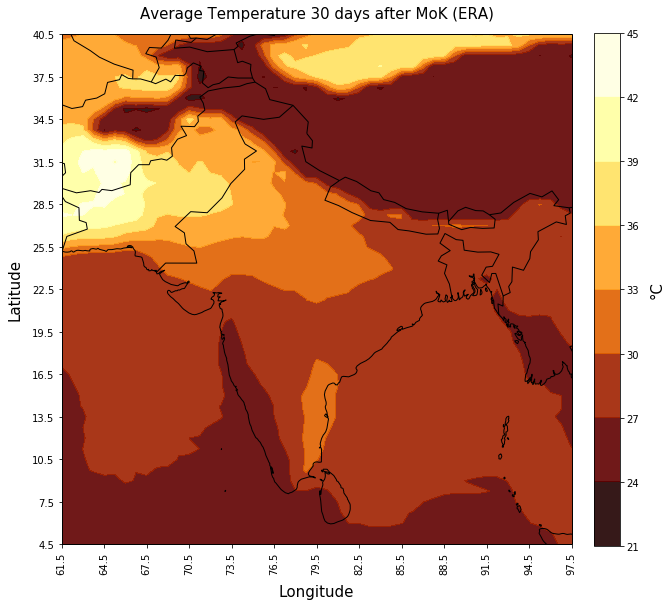

In [33]:
Visualization.create_cartopy_vis(t_plus30, title='Average Temperature 30 days after MoK (ERA)', filename='output/t_avg_plus30.png', vis_type='contour', clabel='°C')

## Wind at 700hPa

In [34]:
era_700['u'][1979].head(3)

time                1979-03-01  1979-03-02  1979-03-03  1979-03-04  \
latitude longitude                                                   
4.5      61.50        2.219151    3.989149    6.483997    7.651759   
         62.25        2.802325    4.339807    6.446578    7.479254   
         63.00        3.315133    4.585268    6.344911    7.208847   

time                1979-03-05  1979-03-06  1979-03-07  1979-03-08  \
latitude longitude                                                   
4.5      61.50        5.083249   -1.992274   -5.641704   -4.146819   
         62.25        4.778482   -1.998628   -5.707835   -4.245662   
         63.00        4.364047   -2.036988   -5.595577   -4.307557   

time                1979-03-09  1979-03-10     ...      1979-10-22  \
latitude longitude                             ...                   
4.5      61.50       -3.521518   -4.569962     ...       -3.314889   
         62.25       -3.683198   -4.701988     ...       -3.306182   
         63.00       -3.756624   -4.671629     ...       -3.360781   

time                1979-10-23  1979-10-24  1979-10-25  1979-10-26  \
latitude longitude                                                   
4.5      61.50       -2.409298   -3.684374   -3.005651   -0.808745   
         62.25       -2.407415   -3.503633   -2.729832   -0.519746   
         63.00       -2.458249   -3.319596   -2.525556   -0.030472   

time                1979-10-27  1979-10-28  1979-10-29  1979-10-30  1979-10-31  
latitude longitude                                                              
4.5      61.50        5.012411    6.475290    4.377932    3.901602    3.996445  
         62.25        5.315059    7.521380    5.262578    4.413704    4.298622  
         63.00        5.723611    8.593122    6.199000    4.976875    4.451594  

[3 rows x 245 columns]

In [35]:
era_700['v'][1979].head(3)

time                1979-03-01  1979-03-02  1979-03-03  1979-03-04  \
latitude longitude                                                   
4.5      61.50        1.209328   -0.161429    1.485260    2.315503   
         62.25        0.955427   -0.243986    1.542449    2.121906   
         63.00        0.681943   -0.321648    1.550460    1.833958   

time                1979-03-05  1979-03-06  1979-03-07  1979-03-08  \
latitude longitude                                                   
4.5      61.50        0.773401   -0.130498    0.551988    1.764530   
         62.25        0.847057    0.039289    0.177032    1.599861   
         63.00        0.865304    0.170579   -0.062183    1.327267   

time                1979-03-09  1979-03-10     ...      1979-10-22  \
latitude longitude                             ...                   
4.5      61.50       -0.762694   -1.479226     ...       -1.113839   
         62.25       -1.247577   -1.554440     ...       -0.950283   
         63.00       -1.427155   -1.638554     ...       -0.974093   

time                1979-10-23  1979-10-24  1979-10-25  1979-10-26  \
latitude longitude                                                   
4.5      61.50       -1.191723   -0.936264   -1.998156   -0.909115   
         62.25       -1.318785   -1.025719   -2.395587   -0.937376   
         63.00       -1.353944   -1.192168   -2.645483   -0.984552   

time                1979-10-27  1979-10-28  1979-10-29  1979-10-30  1979-10-31  
latitude longitude                                                              
4.5      61.50        0.698187   -1.923832   -1.626316   -1.548654    0.774958  
         62.25        1.094283   -1.124520   -1.507042   -1.261374    0.836375  
         63.00        1.324152   -0.021683   -1.141210   -0.912898    0.901575  

[3 rows x 245 columns]

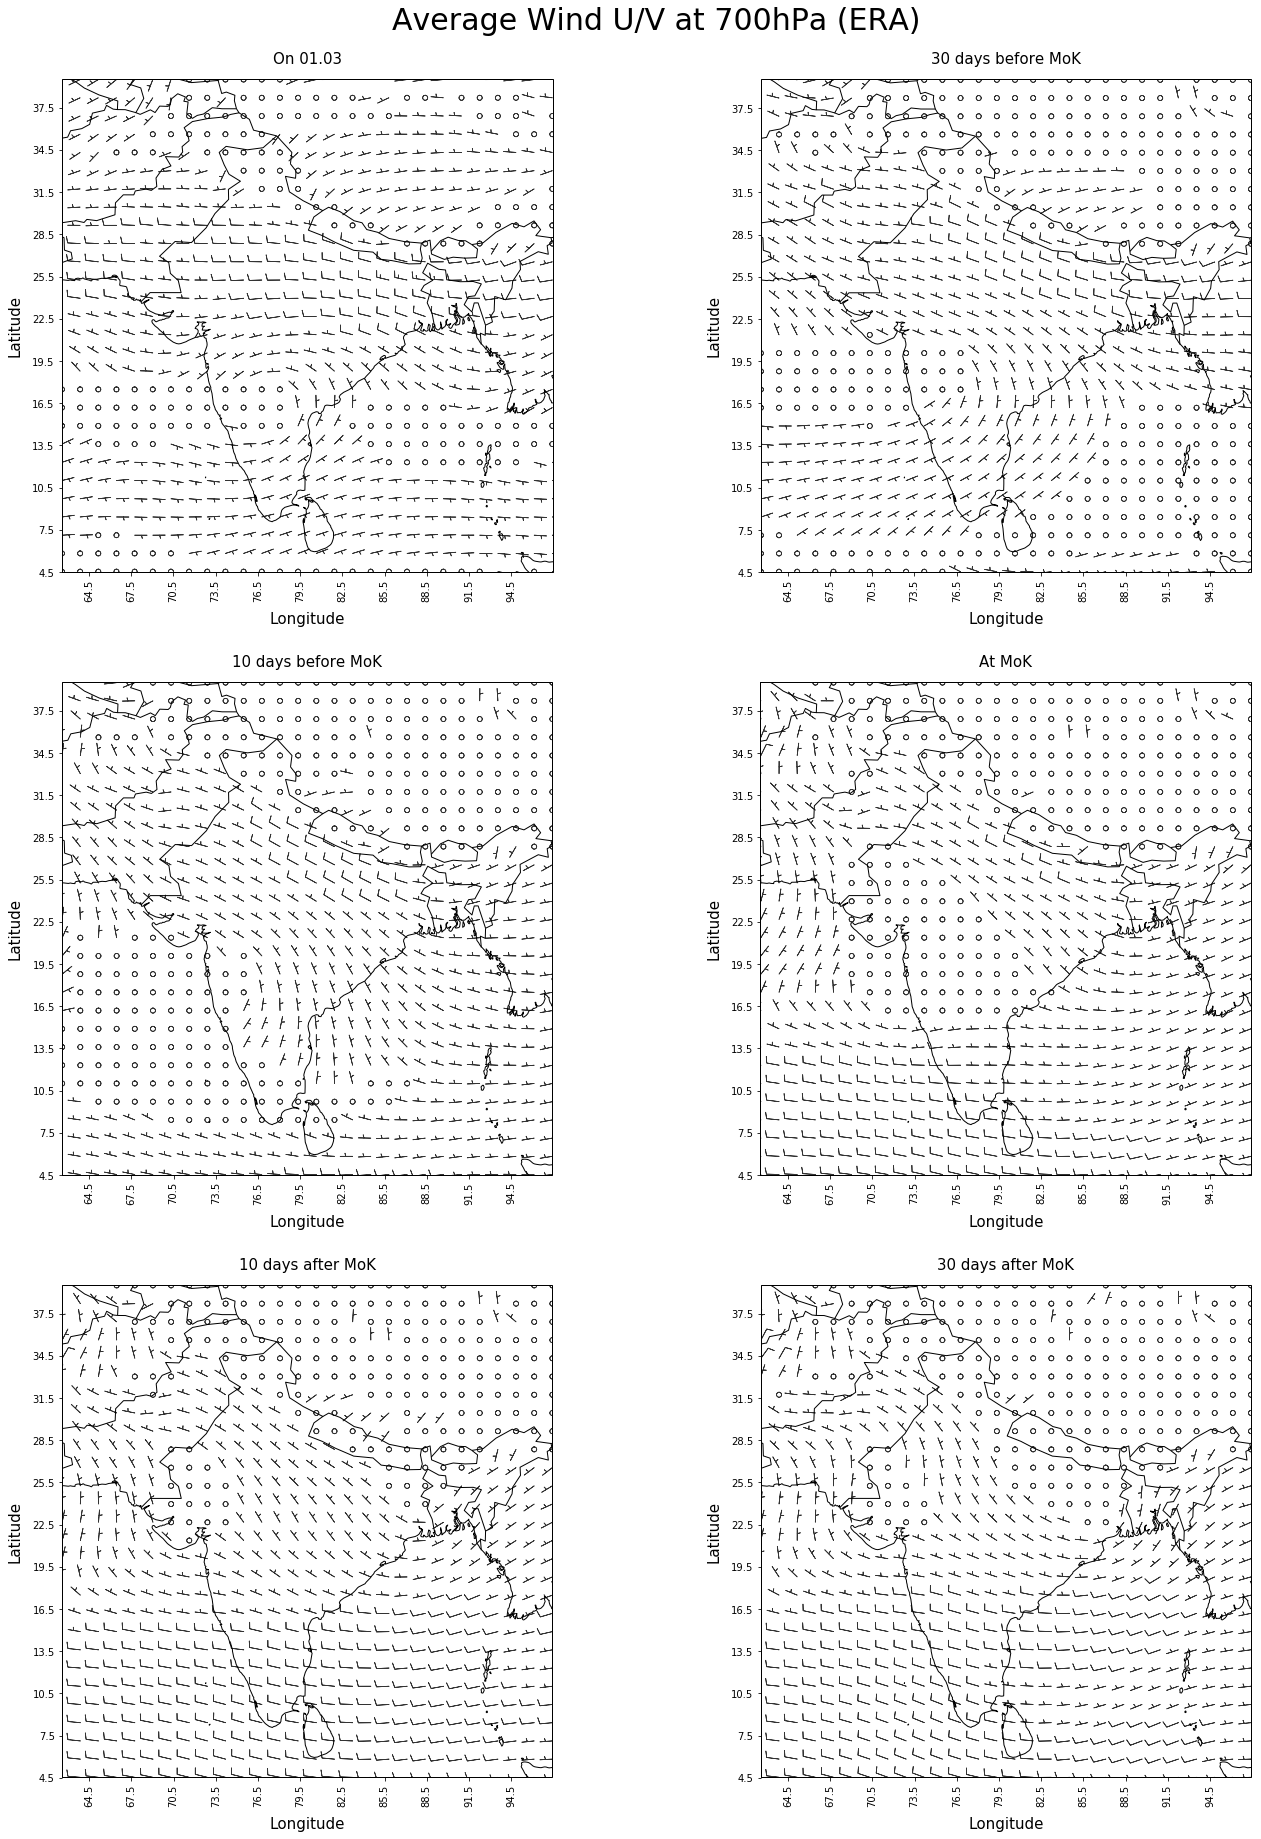

In [121]:
fig, axes = plt.subplots(3, 2, figsize=(20, 25), subplot_kw=dict(projection=ccrs.PlateCarree()))

u_onset = Visualization.prepare_cartopy_df(era_700['u'], month=3, day=1)
v_onset = Visualization.prepare_cartopy_df(era_700['v'], month=3, day=1)
Visualization.create_cartopy_vis({'u': u_onset, 'v': v_onset}, ax=axes[0, 0], title='On 01.03', clabel='$ms^{-1}$', vis_type='barbs')

v_min30 = Visualization.prepare_cartopy_df(era_700['v'], onset_dates=onset_dates['objective'], offset=-30)
u_min30 = Visualization.prepare_cartopy_df(era_700['u'], onset_dates=onset_dates['objective'], offset=-30)
Visualization.create_cartopy_vis({'u': u_min30, 'v': v_min30}, ax=axes[0, 1], title='30 days before MoK', clabel='$ms^{-1}$', vis_type='barbs')

u_min10 = Visualization.prepare_cartopy_df(era_700['u'], onset_dates=onset_dates['objective'], offset=-10)
v_min10 = Visualization.prepare_cartopy_df(era_700['v'], onset_dates=onset_dates['objective'], offset=-10)
Visualization.create_cartopy_vis({'u': u_min10, 'v': v_min10}, ax=axes[1, 0], title='10 days before MoK', clabel='$ms^{-1}$', vis_type='barbs')

v_onset = Visualization.prepare_cartopy_df(era_700['v'], onset_dates=onset_dates['objective'])
u_onset = Visualization.prepare_cartopy_df(era_700['u'], onset_dates=onset_dates['objective'])
Visualization.create_cartopy_vis({'u': u_onset, 'v': v_onset}, ax=axes[1, 1], title='At MoK', clabel='$ms^{-1}$', vis_type='barbs')

v_plus10 = Visualization.prepare_cartopy_df(era_700['v'], onset_dates=onset_dates['objective'], offset=+10)
u_plus10 = Visualization.prepare_cartopy_df(era_700['u'], onset_dates=onset_dates['objective'], offset=+10)
Visualization.create_cartopy_vis({'u': u_plus10, 'v': v_plus10}, ax=axes[2, 0], title='10 days after MoK', clabel='$ms^{-1}$', vis_type='barbs')

v_plus30 = Visualization.prepare_cartopy_df(era_700['v'], onset_dates=onset_dates['objective'], offset=+30)
u_plus30 = Visualization.prepare_cartopy_df(era_700['u'], onset_dates=onset_dates['objective'], offset=+30)
Visualization.create_cartopy_vis({'u': u_plus30, 'v': v_plus30}, ax=axes[2, 1], title='30 days after MoK', clabel='$ms^{-1}$', vis_type='barbs')

supttl = fig.suptitle('Average Wind U/V at 700hPa (ERA)', size=30)
supttl.set_position([0.5, 1.02])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig('output/wind_avg.png', bbox_inches='tight')

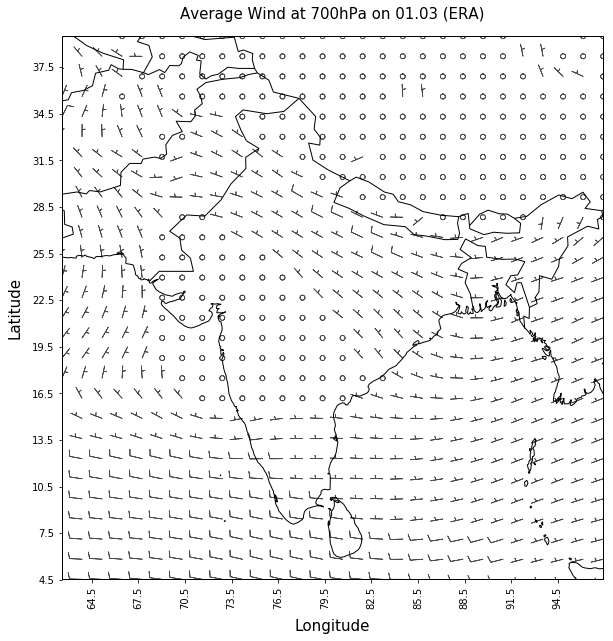

In [38]:
Visualization.create_cartopy_vis({'u': u_onset, 'v': v_onset}, title='Average Wind at 700hPa on 01.03 (ERA)', filename='output/wind_avg_onset.png', clabel='$ms^{-1}$', vis_type='barbs')

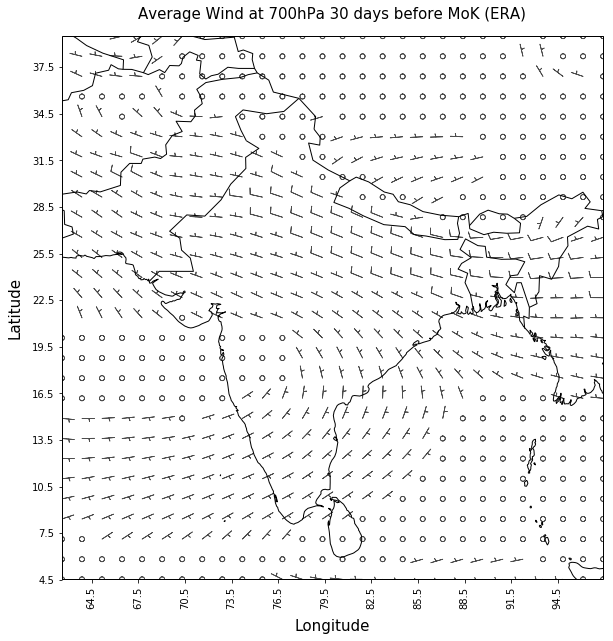

In [39]:
Visualization.create_cartopy_vis({'u': u_min30, 'v': v_min30}, title='Average Wind at 700hPa 30 days before MoK (ERA)', filename='output/wind_avg_min30.png', clabel='$ms^{-1}$', vis_type='barbs')

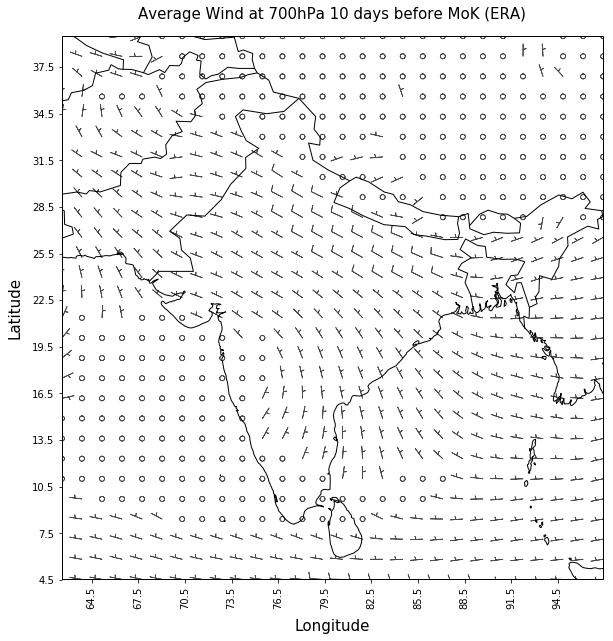

In [40]:
Visualization.create_cartopy_vis({'u': u_min10, 'v': v_min10}, title='Average Wind at 700hPa 10 days before MoK (ERA)', filename='output/wind_avg_min10.png', clabel='$ms^{-1}$', vis_type='barbs')

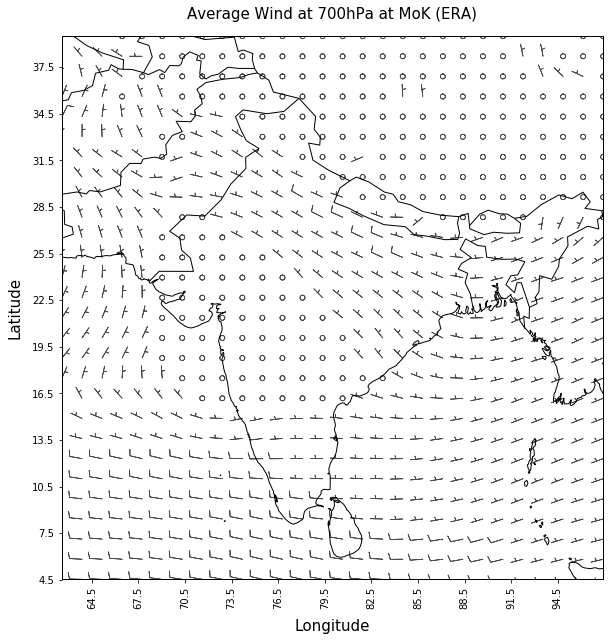

In [41]:
Visualization.create_cartopy_vis({'u': u_onset, 'v': v_onset}, title='Average Wind at 700hPa at MoK (ERA)', filename='output/wind_avg_onset.png', clabel='$ms^{-1}$', vis_type='barbs')

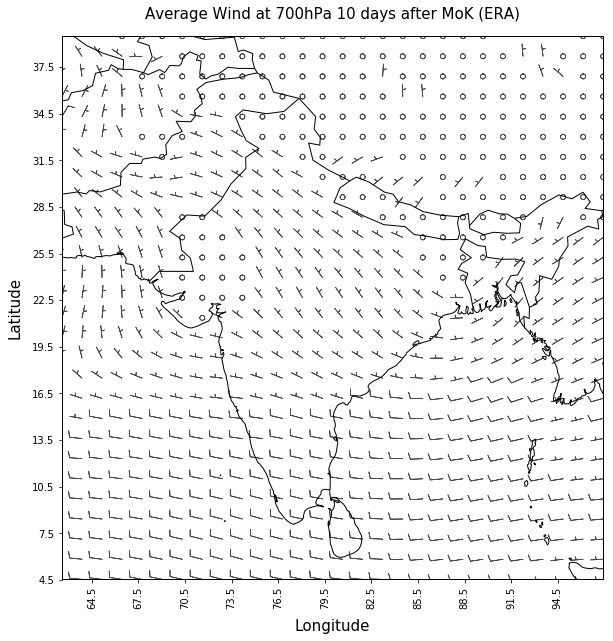

In [42]:
Visualization.create_cartopy_vis({'u': u_plus10, 'v': v_plus10}, title='Average Wind at 700hPa 10 days after MoK (ERA)', filename='output/wind_avg_plus10.png', clabel='$ms^{-1}$', vis_type='barbs')

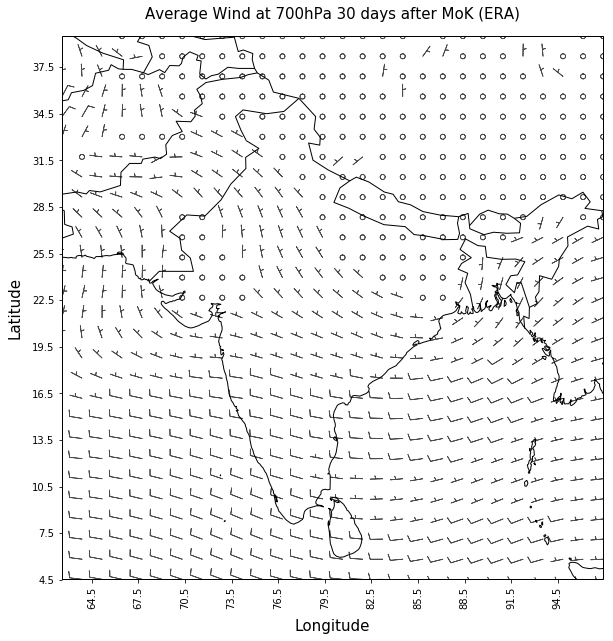

In [43]:
Visualization.create_cartopy_vis({'u': u_plus30, 'v': v_plus30}, title='Average Wind at 700hPa 30 days after MoK (ERA)', filename='output/wind_avg_plus30.png', clabel='$ms^{-1}$', vis_type='barbs')

## Precipitation

In [104]:
prec_params = dict(
    index_step=12,
    clabel='mm/day',
    gaussian_filtering=0.3
)

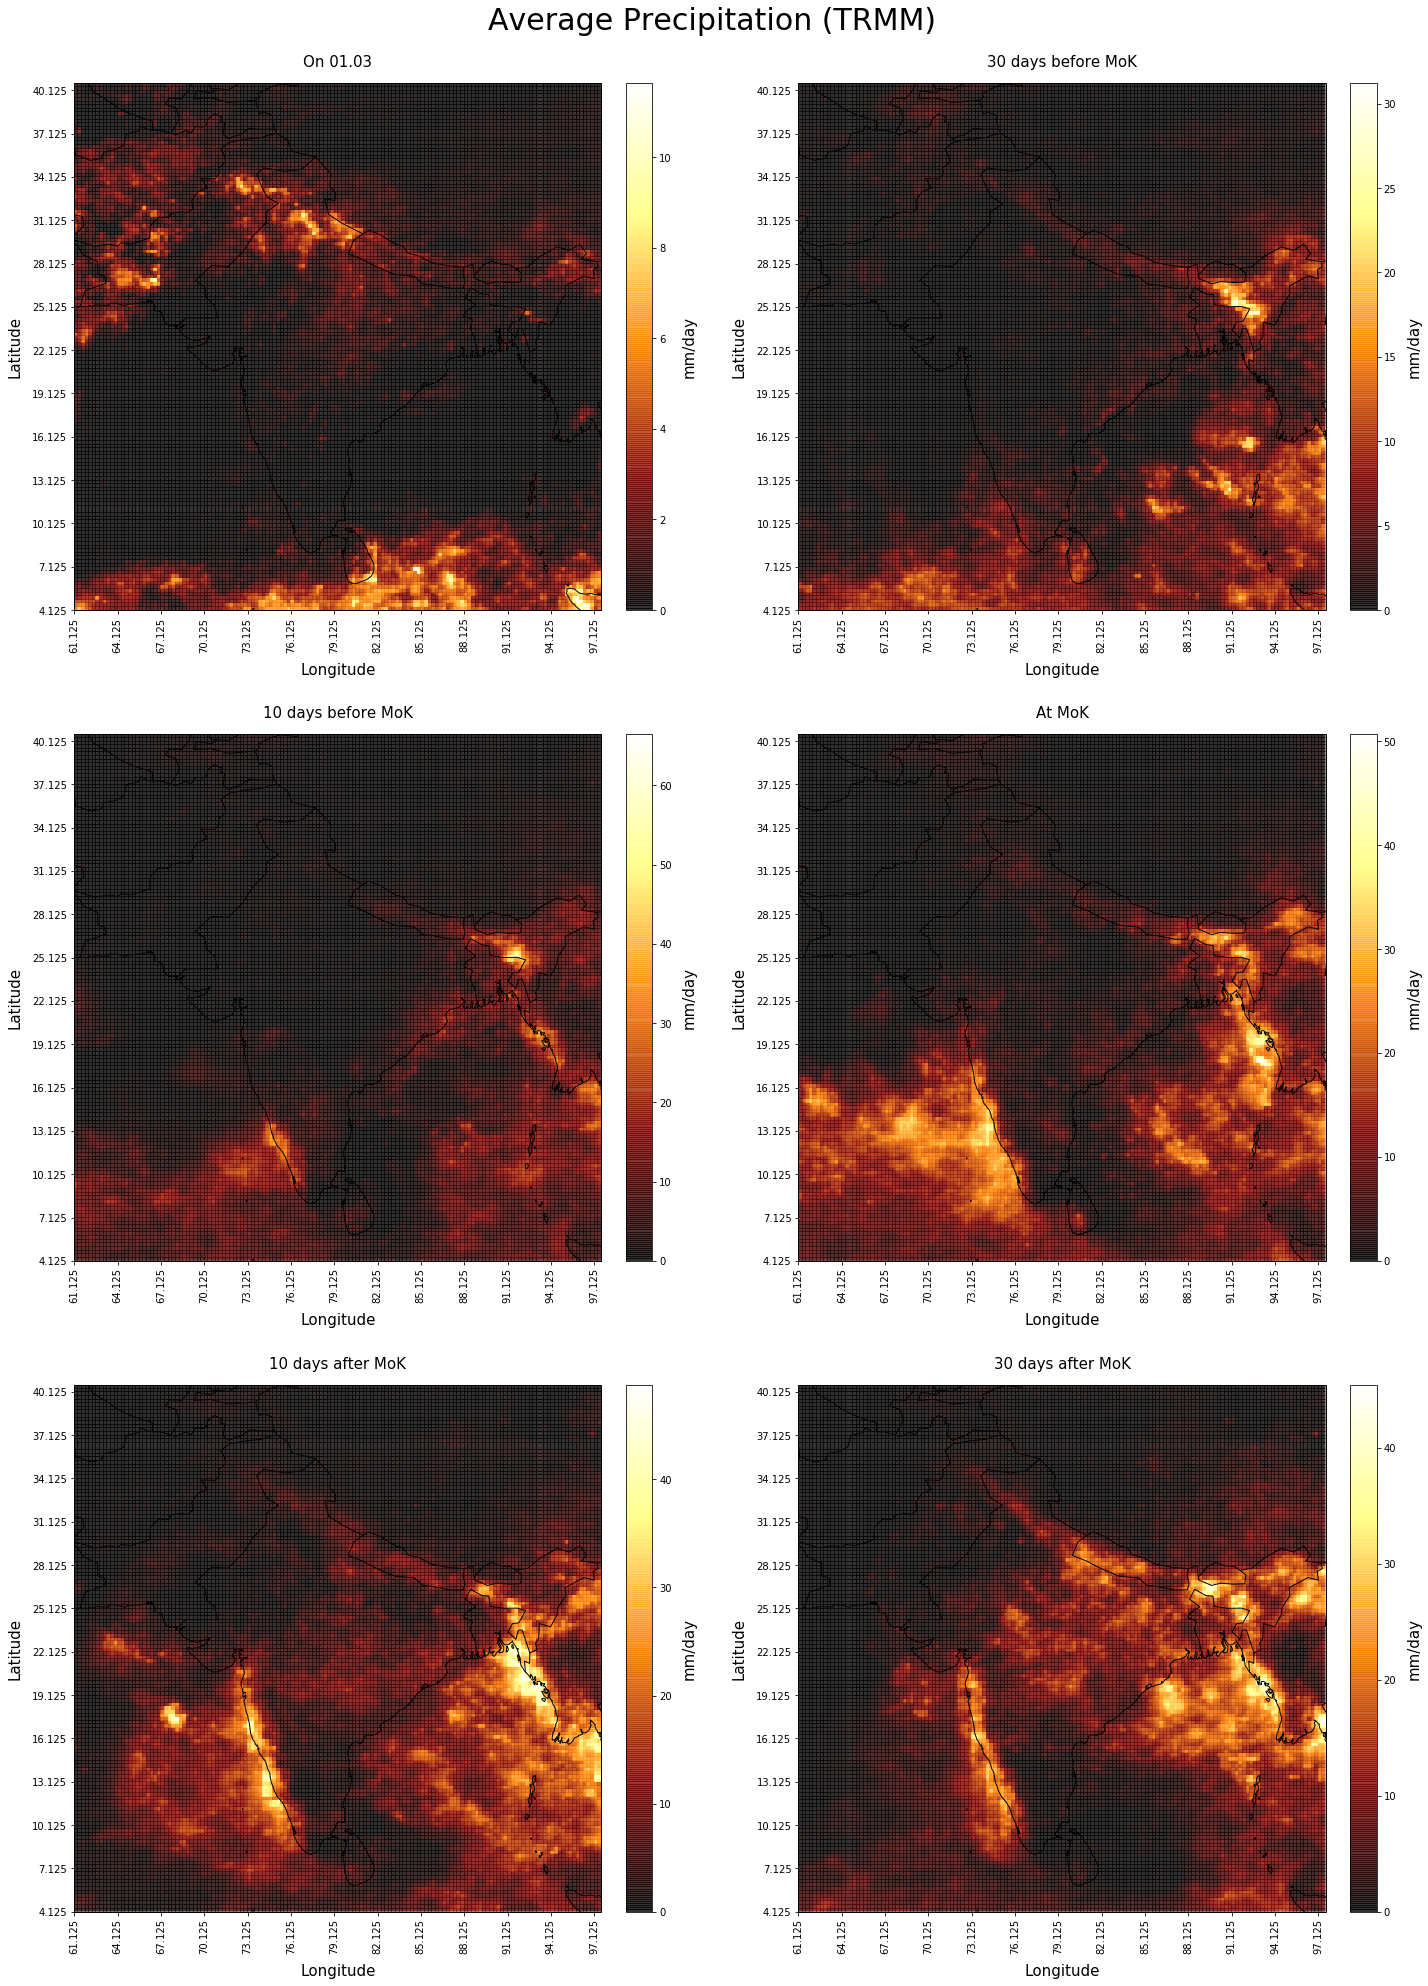

In [122]:
fig, axes = plt.subplots(3, 2, figsize=(20, 27), subplot_kw=dict(projection=ccrs.PlateCarree()))

prec_average = Visualization.prepare_cartopy_df(trmm_dict, month=3, day=1)
Visualization.create_cartopy_vis(prec_average, ax=axes[0, 0], title='On 01.03', **prec_params)

prec_min30 = Visualization.prepare_cartopy_df(trmm_dict, onset_dates=onset_dates['objective'], offset=-30)
Visualization.create_cartopy_vis(prec_min30, ax=axes[0, 1], title='30 days before MoK', **prec_params)

prec_min10 = Visualization.prepare_cartopy_df(trmm_dict, onset_dates=onset_dates['objective'], offset=-10)
Visualization.create_cartopy_vis(prec_min10, ax=axes[1, 0], title='10 days before MoK', **prec_params)

prec_onset = Visualization.prepare_cartopy_df(trmm_dict, YEARS_TRMM, onset_dates=onset_dates['objective'])
Visualization.create_cartopy_vis(prec_onset, ax=axes[1, 1], title='At MoK', **prec_params)

prec_plus10 = Visualization.prepare_cartopy_df(trmm_dict, onset_dates=onset_dates['objective'], offset=+10)
Visualization.create_cartopy_vis(prec_plus10, ax=axes[2, 0], title='10 days after MoK', **prec_params)

prec_plus30 = Visualization.prepare_cartopy_df(trmm_dict, onset_dates=onset_dates['objective'], offset=+30)
Visualization.create_cartopy_vis(prec_plus30, ax=axes[2, 1], title='30 days after MoK', **prec_params)

supttl = fig.suptitle('Average Precipitation (TRMM)', size=30)
supttl.set_position([0.5, 1.02])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig('output/prec_avg.png', bbox_inches='tight')

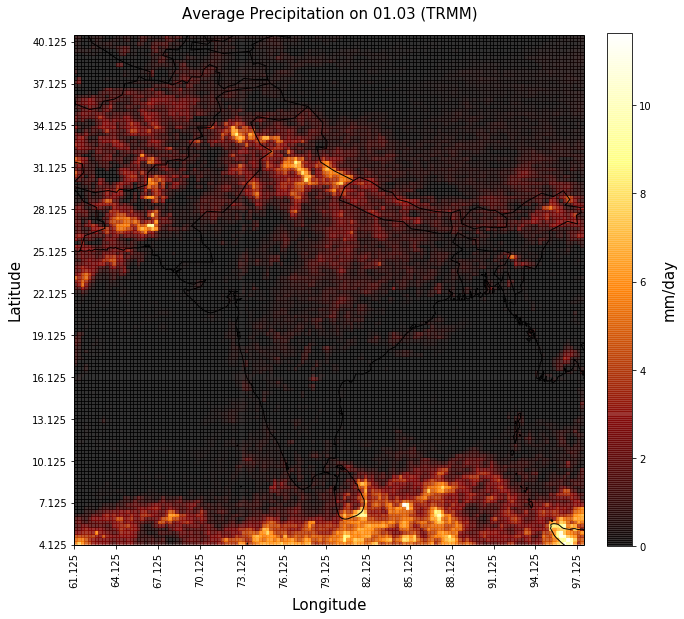

In [106]:
Visualization.create_cartopy_vis(prec_average, title='Average Precipitation on 01.03 (TRMM)', filename='output/prec_avg_first.png', **prec_params)

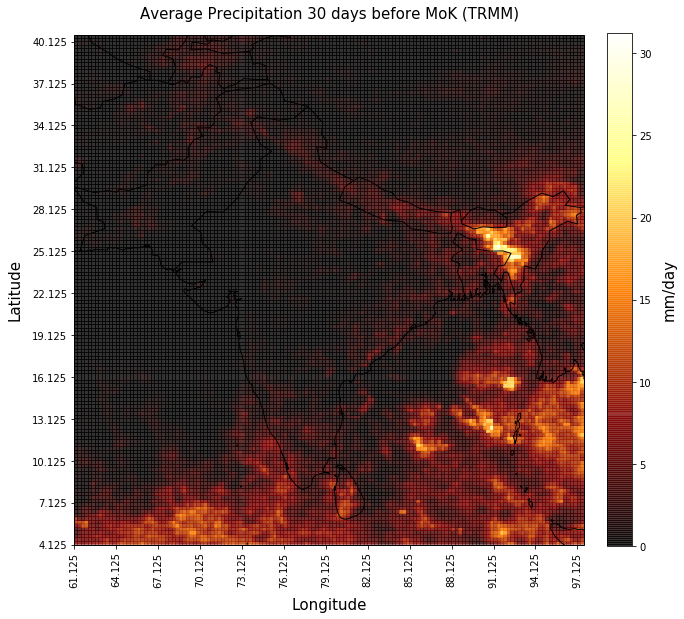

In [107]:
Visualization.create_cartopy_vis(prec_min30, title='Average Precipitation 30 days before MoK (TRMM)', filename='output/prec_avg_min30.png', **prec_params)

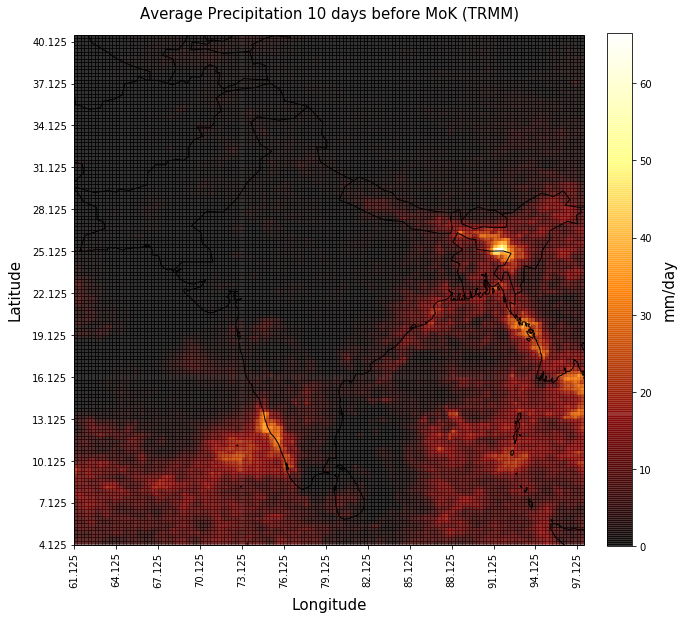

In [108]:
Visualization.create_cartopy_vis(prec_min10, title='Average Precipitation 10 days before MoK (TRMM)', filename='output/prec_avg_min10.png', **prec_params)

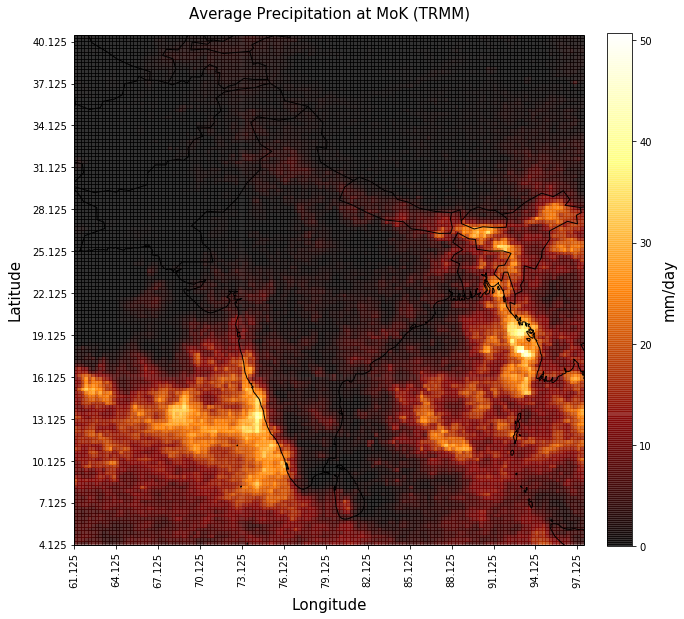

In [109]:
Visualization.create_cartopy_vis(prec_onset, title='Average Precipitation at MoK (TRMM)', filename='output/prec_avg_onset.png', **prec_params)

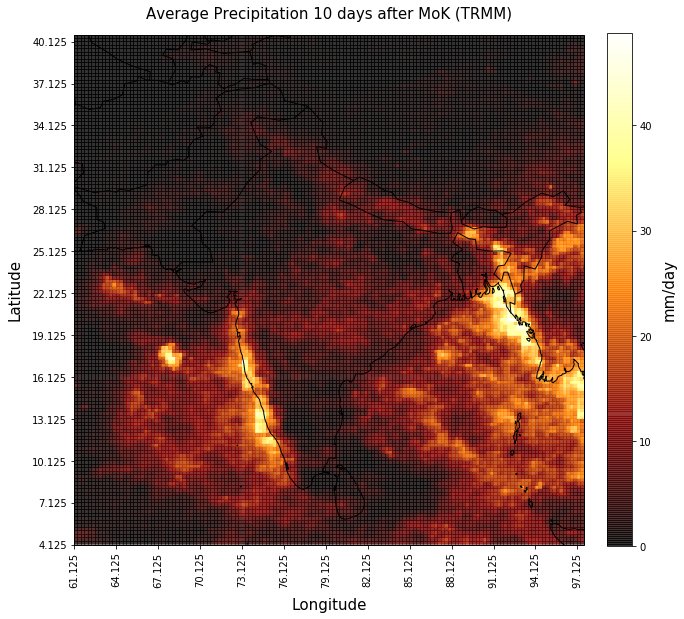

In [110]:
Visualization.create_cartopy_vis(prec_plus10, title='Average Precipitation 10 days after MoK (TRMM)', filename='output/prec_avg_plus10.png', **prec_params)

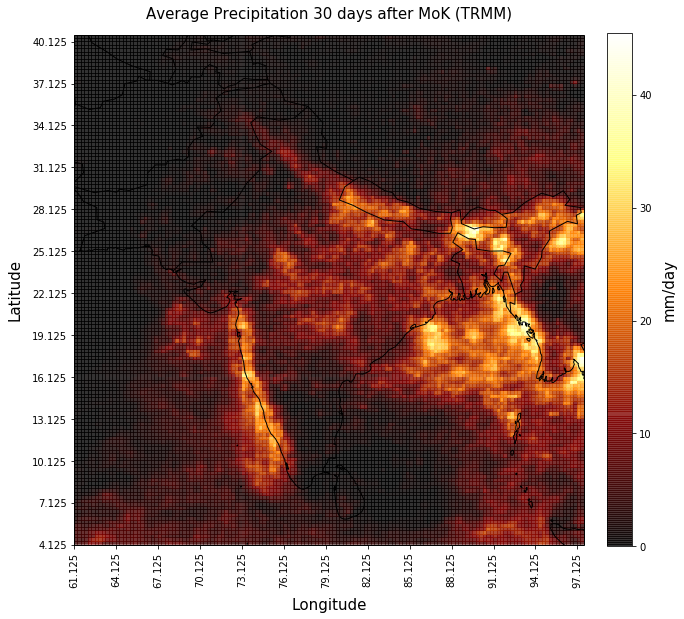

In [111]:
Visualization.create_cartopy_vis(prec_plus30, title='Average Precipitation 30 days after MoK (TRMM)', filename='output/prec_avg_plus30.png', **prec_params)